# Projekt końcowy

### Poniższy projekt ma na celu zbudowanie modelu klasyfikacyjnego, który na podstawie podanych danych będzie przewidywał, czy potencjalny pożyczkobiorca spłaci swój dług.

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (RandomForestRegressor, GradientBoostingRegressor,AdaBoostRegressor,BaggingRegressor)
from sklearn.svm import SVR
from sklearn import metrics
from sklearn.metrics import accuracy_score,roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import VotingRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.cluster import KMeans
from sklearn.utils import resample

In [2]:
df=pd.read_csv('Loan_data.csv')

C:\Users\asus\AppData\Local\Temp\ipykernel_2312\140937924.py:1: DtypeWarning: Columns (0,49) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('Loan_data.csv')


In [3]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,1077501,NaN,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,NaN,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,NaN,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,NaN,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,NaN,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.shape

(42536, 151)

In [5]:
#Dane zawierają 42536 obserwacji i 151 kolumn - łącznie z kolumną ze statusem pożyczki (zmienna objaśniana)

In [6]:
df.dtypes

id                        object
member_id                float64
loan_amnt                float64
funded_amnt              float64
funded_amnt_inv          float64
                          ...   
settlement_status         object
settlement_date           object
settlement_amount        float64
settlement_percentage    float64
settlement_term          float64
Length: 151, dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42536 entries, 0 to 42535
Columns: 151 entries, id to settlement_term
dtypes: float64(120), object(31)
memory usage: 49.0+ MB


In [8]:
df.keys()

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'disbursement_method', 'debt_settlement_flag',
       'debt_settlement_flag_date', 'settlement_status', 'settlement_date',
       'settlement_amount', 'settlement_percentage', 'settlement_term'],
      dtype='object', length=151)

In [9]:
df.describe()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,...,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
count,0.0,42535.000000,42535.000000,42535.000000,42535.000000,4.253100e+04,42535.000000,42506.000000,42535.000000,42535.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,160.000000,160.000000,160.000000
mean,NaN,11089.722581,10821.585753,10139.938785,322.623063,6.913656e+04,13.373043,0.152449,713.052545,717.052545,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4272.137875,49.905875,1.200000
std,NaN,7410.938391,7146.914675,7131.598014,208.927216,6.409635e+04,6.726315,0.512406,36.188439,36.188439,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3119.373774,15.563690,4.085255
min,NaN,500.000000,500.000000,0.000000,15.670000,1.896000e+03,0.000000,0.000000,610.000000,614.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,193.290000,10.690000,0.000000
25%,NaN,5200.000000,5000.000000,4950.000000,165.520000,4.000000e+04,8.200000,0.000000,685.000000,689.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1842.750000,40.000000,0.000000
50%,NaN,9700.000000,9600.000000,8500.000000,277.690000,5.900000e+04,13.470000,0.000000,710.000000,714.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3499.350000,49.970000,0.000000
75%,NaN,15000.000000,15000.000000,14000.000000,428.180000,8.250000e+04,18.680000,0.000000,740.000000,744.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5701.100000,60.652500,0.000000
max,NaN,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,13.000000,825.000000,829.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14798.200000,92.740000,24.000000


In [10]:
#Importuję opis zmiennych 
df_description = pd.read_csv('LCDataDictionary.csv')

In [11]:
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 151)
pd.set_option('display.max_colwidth', 2000)
pd.set_option('max_colwidth', 2000)
pd.options.display.float_format = '{:.3f}'.format

In [12]:
df_description[['LoanStatNew', 'Description']]

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower is now delinquent.
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan application
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by the borrower during registration.
5,annual_inc_joint,The combined self-reported annual income provided by the co-borrowers during registration
6,application_type,Indicates whether the loan is an individual application or a joint application with two co-borrowers
7,avg_cur_bal,Average current balance of all accounts
8,bc_open_to_buy,Total open to buy on revolving bankcards.
9,bc_util,Ratio of total current balance to high credit/credit limit for all bankcard accounts.


### Sprawdzam brakujące wartości

In [13]:
df.isna().sum()

id                                                0
member_id                                     42536
loan_amnt                                         1
funded_amnt                                       1
funded_amnt_inv                                   1
term                                              1
int_rate                                          1
installment                                       1
grade                                             1
sub_grade                                         1
emp_title                                      2627
emp_length                                     1113
home_ownership                                    1
annual_inc                                        5
verification_status                               1
issue_d                                           1
loan_status                                       1
pymnt_plan                                        1
url                                               1
desc        

In [14]:
#Sprawdzam i usuwam kolumny w 100% z nan

In [15]:
nan_cols = [i for i in df.columns if df[i].isnull().all()]

In [16]:
nan_cols

['member_id',
 'mths_since_last_major_derog',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'tot_coll_amt',
 'tot_cur_bal',
 'open_acc_6m',
 'open_act_il',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'total_bal_il',
 'il_util',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'all_util',
 'total_rev_hi_lim',
 'inq_fi',
 'total_cu_tl',
 'inq_last_12m',
 'acc_open_past_24mths',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'mo_sin_old_il_acct',
 'mo_sin_old_rev_tl_op',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl',
 'mort_acc',
 'mths_since_recent_bc',
 'mths_since_recent_bc_dlq',
 'mths_since_recent_inq',
 'mths_since_recent_revol_delinq',
 'num_accts_ever_120_pd',
 'num_actv_bc_tl',
 'num_actv_rev_tl',
 'num_bc_sats',
 'num_bc_tl',
 'num_il_tl',
 'num_op_rev_tl',
 'num_rev_accts',
 'num_rev_tl_bal_gt_0',
 'num_sats',
 'num_tl_120dpd_2m',
 'num_tl_30dpd',
 'num_tl_90g_dpd_24m',
 'num_tl_op_past_12m',
 'pct_tl_nvr_dlq',
 'percent_bc_gt_75',
 'tot_hi_cred_li

In [17]:
df.drop(
['member_id',
 'mths_since_last_major_derog',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'tot_coll_amt',
 'tot_cur_bal',
 'open_acc_6m',
 'open_act_il',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'total_bal_il',
 'il_util',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'all_util',
 'total_rev_hi_lim',
 'inq_fi',
 'total_cu_tl',
 'inq_last_12m',
 'acc_open_past_24mths',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'mo_sin_old_il_acct',
 'mo_sin_old_rev_tl_op',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl',
 'mort_acc',
 'mths_since_recent_bc',
 'mths_since_recent_bc_dlq',
 'mths_since_recent_inq',
 'mths_since_recent_revol_delinq',
 'num_accts_ever_120_pd',
 'num_actv_bc_tl',
 'num_actv_rev_tl',
 'num_bc_sats',
 'num_bc_tl',
 'num_il_tl',
 'num_op_rev_tl',
 'num_rev_accts',
 'num_rev_tl_bal_gt_0',
 'num_sats',
 'num_tl_120dpd_2m',
 'num_tl_30dpd',
 'num_tl_90g_dpd_24m',
 'num_tl_op_past_12m',
 'pct_tl_nvr_dlq',
 'percent_bc_gt_75',
 'tot_hi_cred_lim',
 'total_bal_ex_mort',
 'total_bc_limit',
 'total_il_high_credit_limit',
 'revol_bal_joint',
 'sec_app_fico_range_low',
 'sec_app_fico_range_high',
 'sec_app_earliest_cr_line',
 'sec_app_inq_last_6mths',
 'sec_app_mort_acc',
 'sec_app_open_acc',
 'sec_app_revol_util',
 'sec_app_open_act_il',
 'sec_app_num_rev_accts',
 'sec_app_chargeoff_within_12_mths',
 'sec_app_collections_12_mths_ex_med',
 'sec_app_mths_since_last_major_derog',
 'hardship_type',
 'hardship_reason',
 'hardship_status',
 'deferral_term',
 'hardship_amount',
 'hardship_start_date',
 'hardship_end_date',
 'payment_plan_start_date',
 'hardship_length',
 'hardship_dpd',
 'hardship_loan_status',
 'orig_projected_additional_accrued_interest',
 'hardship_payoff_balance_amount',
 'hardship_last_payment_amount'], 
axis=1, inplace=True)

In [18]:
#Usuwam kolumny, które zawierają nan w 85% 

In [19]:
nan_cols85 = [i for i in df.columns if df[i].isnull().sum() > 0.85*len(df)]

In [20]:
nan_cols85

['mths_since_last_record',
 'next_pymnt_d',
 'debt_settlement_flag_date',
 'settlement_status',
 'settlement_date',
 'settlement_amount',
 'settlement_percentage',
 'settlement_term']

In [21]:
df.drop(
['mths_since_last_record',
 'next_pymnt_d',
 'debt_settlement_flag_date',
 'settlement_status',
 'settlement_date',
 'settlement_amount',
 'settlement_percentage',
 'settlement_term'],
axis=1, inplace=True)

In [22]:
#Usunięcie kolumn ze zbędnymi informacjami

In [23]:
df.drop(
['url', 
 'id', 
 'zip_code', 
 'addr_state', 
 'title', 
 'issue_d',
 'last_pymnt_amnt',
 'last_pymnt_d', 
 'last_credit_pull_d',
 'emp_title',
 'disbursement_method',
 'recoveries',
 'collection_recovery_fee',
 'sub_grade'],
axis=1, inplace=True)

In [24]:
#Usunięcie kolumn, które zawierają informacje z przyszłości, niedostępne w momencie udzielania pożyczki

In [25]:
df.drop(
['delinq_2yrs', 
 'mths_since_last_delinq', 
 'delinq_amnt', 
 'hardship_flag', 
 'acc_now_delinq',
 'chargeoff_within_12_mths',
 'debt_settlement_flag',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'last_fico_range_high',
 'last_fico_range_low'],
axis=1, inplace=True)

In [26]:
#Sprawdzam, które kolumny przyjmują tylko jedną wartość. Sprawdzam też, czy zawierają NaNy i czy mogą one dać jakąś informację

In [27]:
df['application_type'].value_counts()

Individual    42535
Name: application_type, dtype: int64

In [28]:
df['application_type'].isnull().sum()

1

In [29]:
df.drop(
['application_type'],
axis=1, inplace=True)

In [30]:
df['pymnt_plan'].value_counts()

n    42535
Name: pymnt_plan, dtype: int64

In [31]:
df['pymnt_plan'].isnull().sum()

1

In [32]:
df.drop(
['pymnt_plan'],
axis=1, inplace=True)

In [33]:
df['initial_list_status'].value_counts()

f    42535
Name: initial_list_status, dtype: int64

In [34]:
df['initial_list_status'].isnull().sum()

1

In [35]:
df.drop(
['initial_list_status'],
axis=1, inplace=True)

In [36]:
df['out_prncp'].value_counts()

0.000    42535
Name: out_prncp, dtype: int64

In [37]:
df['out_prncp'].isnull().sum()

1

In [38]:
df.drop(
['out_prncp'],
axis=1, inplace=True)

In [39]:
df['out_prncp_inv'].value_counts()

0.000    42535
Name: out_prncp_inv, dtype: int64

In [40]:
df['out_prncp_inv'].isnull().sum()

1

In [41]:
df.drop(
['out_prncp_inv'],
axis=1, inplace=True)

In [42]:
df['policy_code'].value_counts()

1.000    42535
Name: policy_code, dtype: int64

In [43]:
df['policy_code'].isnull().sum()

1

In [44]:
df.drop(
['policy_code'],
axis=1, inplace=True)

In [45]:
df['collections_12_mths_ex_med'].value_counts()

0.000    42390
Name: collections_12_mths_ex_med, dtype: int64

In [46]:
df['collections_12_mths_ex_med'].isnull().sum()

146

In [47]:
df.drop(
['collections_12_mths_ex_med'],
axis=1, inplace=True)

In [48]:
df['tax_liens'].value_counts()

0.000    42429
1.000        1
Name: tax_liens, dtype: int64

In [49]:
df['tax_liens'].isnull().sum()

106

In [50]:
df.drop(
['tax_liens'],
axis=1, inplace=True)

In [51]:
#Decuję też usunąć kolumnę 'desc' - w większości powiela ona dane z kolumny 'purpose'
df.drop(
['desc'],
axis=1, inplace=True)

In [52]:
df.shape

(42536, 24)

### Przekształcenie wartości w kolumnach - usunięcie procentów, dodatkowych znaków, itd

In [53]:
def usuniecie_miesiecy(df, column):
    df[column] = pd.to_numeric(df[column].str.replace('months', ''))

In [54]:
usuniecie_miesiecy(df, 'term')

In [55]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies
0,5000.000,5000.000,4975.000,36.000,10.65%,162.870,B,10+ years,RENT,24000.000,Verified,Fully Paid,credit_card,27.650,Jan-1985,735.000,739.000,1.000,3.000,0.000,13648.000,83.7%,9.000,0.000
1,2500.000,2500.000,2500.000,60.000,15.27%,59.830,C,< 1 year,RENT,30000.000,Source Verified,Charged Off,car,1.000,Apr-1999,740.000,744.000,5.000,3.000,0.000,1687.000,9.4%,4.000,0.000
2,2400.000,2400.000,2400.000,36.000,15.96%,84.330,C,10+ years,RENT,12252.000,Not Verified,Fully Paid,small_business,8.720,Nov-2001,735.000,739.000,2.000,2.000,0.000,2956.000,98.5%,10.000,0.000
3,10000.000,10000.000,10000.000,36.000,13.49%,339.310,C,10+ years,RENT,49200.000,Source Verified,Fully Paid,other,20.000,Feb-1996,690.000,694.000,1.000,10.000,0.000,5598.000,21%,37.000,0.000
4,3000.000,3000.000,3000.000,60.000,12.69%,67.790,B,1 year,RENT,80000.000,Source Verified,Fully Paid,other,17.940,Jan-1996,695.000,699.000,0.000,15.000,0.000,27783.000,53.9%,38.000,0.000


In [56]:
#usuwam dodatkowe znaki z kolumny 'emp_length'

In [57]:
df['emp_length'].value_counts()

10+ years    9369
< 1 year     5062
2 years      4743
3 years      4364
4 years      3649
1 year       3595
5 years      3458
6 years      2375
7 years      1875
8 years      1592
9 years      1341
Name: emp_length, dtype: int64

In [58]:
def usuniecie_znakow(df, column):
    df[column] = df[column].str.replace('\+ years', '')
    df[column] = df[column].str.replace('< 1 year', str(0))
    df[column] = df[column].str.replace(' years', '')
    df[column] = df[column].str.replace(' year', '')

In [59]:
usuniecie_znakow(df,'emp_length')

C:\Users\asus\AppData\Local\Temp\ipykernel_2312\1282640428.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df[column] = df[column].str.replace('\+ years', '')


In [60]:
df['emp_length'].value_counts()

10    9369
0     5062
2     4743
3     4364
4     3649
1     3595
5     3458
6     2375
7     1875
8     1592
9     1341
Name: emp_length, dtype: int64

In [61]:
df['emp_length'].unique()

array(['10', '0', '1', '3', '8', '9', '4', '5', '6', '2', '7', nan],
      dtype=object)

In [62]:
#W zbiorze występuje liczba 4 i 4.0. Połączę obie te wartości w jedną

In [63]:
#df['emp_length'] = pd.to_numeric(df['emp_length'], downcast='integer')

In [64]:
#df['emp_length'].unique()

In [65]:
#przekształcenie procentow

In [66]:
df['revol_util'] = df['revol_util'].str.rstrip('%').astype('float') / 100.0

In [67]:
df['int_rate'] = df['int_rate'].str.rstrip('%').astype('float') / 100.0

In [68]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies
0,5000.000,5000.000,4975.000,36.000,0.106,162.870,B,10,RENT,24000.000,Verified,Fully Paid,credit_card,27.650,Jan-1985,735.000,739.000,1.000,3.000,0.000,13648.000,0.837,9.000,0.000
1,2500.000,2500.000,2500.000,60.000,0.153,59.830,C,0,RENT,30000.000,Source Verified,Charged Off,car,1.000,Apr-1999,740.000,744.000,5.000,3.000,0.000,1687.000,0.094,4.000,0.000
2,2400.000,2400.000,2400.000,36.000,0.160,84.330,C,10,RENT,12252.000,Not Verified,Fully Paid,small_business,8.720,Nov-2001,735.000,739.000,2.000,2.000,0.000,2956.000,0.985,10.000,0.000
3,10000.000,10000.000,10000.000,36.000,0.135,339.310,C,10,RENT,49200.000,Source Verified,Fully Paid,other,20.000,Feb-1996,690.000,694.000,1.000,10.000,0.000,5598.000,0.210,37.000,0.000
4,3000.000,3000.000,3000.000,60.000,0.127,67.790,B,1,RENT,80000.000,Source Verified,Fully Paid,other,17.940,Jan-1996,695.000,699.000,0.000,15.000,0.000,27783.000,0.539,38.000,0.000


In [69]:
#wartości związane z datą

In [70]:
df['earliest_cr_line'].value_counts()

Oct-1999    393
Nov-1998    390
Oct-2000    370
Dec-1998    366
Dec-1997    348
           ... 
Jul-1964      1
Mar-1963      1
Nov-1965      1
Apr-1966      1
Nov-1959      1
Name: earliest_cr_line, Length: 530, dtype: int64

In [71]:
df['earliest_cr_line'].dtypes

dtype('O')

In [72]:
#df['earliest_cr_line'].dt.year

In [73]:
df['earliest_cr_line'] = pd.DatetimeIndex(df['earliest_cr_line']).year

In [74]:
df['earliest_cr_line'].value_counts()

2000.000    3436
1999.000    3152
1998.000    3066
2001.000    2667
1997.000    2622
1996.000    2426
1995.000    2292
1994.000    2166
2002.000    2059
2003.000    1976
2004.000    1890
2005.000    1639
1993.000    1610
2006.000    1343
1992.000    1155
1990.000    1113
1991.000    1039
1989.000     931
1988.000     783
2007.000     767
1987.000     664
1986.000     533
1985.000     486
1984.000     433
1983.000     360
1982.000     238
1981.000     207
1980.000     187
1979.000     178
1978.000     173
2008.000     160
1977.000     124
1976.000     112
1975.000      87
1974.000      71
1973.000      69
1972.000      56
1971.000      50
1970.000      49
1969.000      41
1968.000      23
1967.000      18
1963.000      12
1966.000      11
1964.000       9
1965.000       9
1962.000       5
1954.000       2
1959.000       2
1961.000       2
1956.000       1
1946.000       1
1950.000       1
Name: earliest_cr_line, dtype: int64

In [75]:
#pd.to_numeric(df['earliest_cr_line'], downcast='integer')

In [76]:
#zamieniam wartości 'verification_status' na dwie wartości 0 i 1. 

In [77]:
df['verification_status'].value_counts()

Not Verified       18758
Verified           13471
Source Verified    10306
Name: verification_status, dtype: int64

In [78]:
df['verification_status2'] = np.where(df['verification_status'].isin(
    ['Verified', 'Source Verified']), 0, 1)

In [79]:
df['verification_status2'].value_counts()

0    23777
1    18759
Name: verification_status2, dtype: int64

In [80]:
#usuwam pierwotną kolumnę 'verification_status'
df.drop(columns = ['verification_status'], inplace = True)

### BRAKUJĄCE WARTOŚCI

In [81]:
df.isna().sum()

loan_amnt                  1
funded_amnt                1
funded_amnt_inv            1
term                       1
int_rate                   1
installment                1
grade                      1
emp_length              1113
home_ownership             1
annual_inc                 5
loan_status                1
purpose                    1
dti                        1
earliest_cr_line          30
fico_range_low             1
fico_range_high            1
inq_last_6mths            30
open_acc                  30
pub_rec                   30
revol_bal                  1
revol_util                91
total_acc                 30
pub_rec_bankruptcies    1366
verification_status2       0
dtype: int64

array([[<AxesSubplot:title={'center':'loan_amnt'}>,
        <AxesSubplot:title={'center':'funded_amnt'}>,
        <AxesSubplot:title={'center':'funded_amnt_inv'}>,
        <AxesSubplot:title={'center':'term'}>],
       [<AxesSubplot:title={'center':'int_rate'}>,
        <AxesSubplot:title={'center':'installment'}>,
        <AxesSubplot:title={'center':'annual_inc'}>,
        <AxesSubplot:title={'center':'dti'}>],
       [<AxesSubplot:title={'center':'earliest_cr_line'}>,
        <AxesSubplot:title={'center':'fico_range_low'}>,
        <AxesSubplot:title={'center':'fico_range_high'}>,
        <AxesSubplot:title={'center':'inq_last_6mths'}>],
       [<AxesSubplot:title={'center':'open_acc'}>,
        <AxesSubplot:title={'center':'pub_rec'}>,
        <AxesSubplot:title={'center':'revol_bal'}>,
        <AxesSubplot:title={'center':'revol_util'}>],
       [<AxesSubplot:title={'center':'total_acc'}>,
        <AxesSubplot:title={'center':'pub_rec_bankruptcies'}>,
        <AxesSubplot:title={'

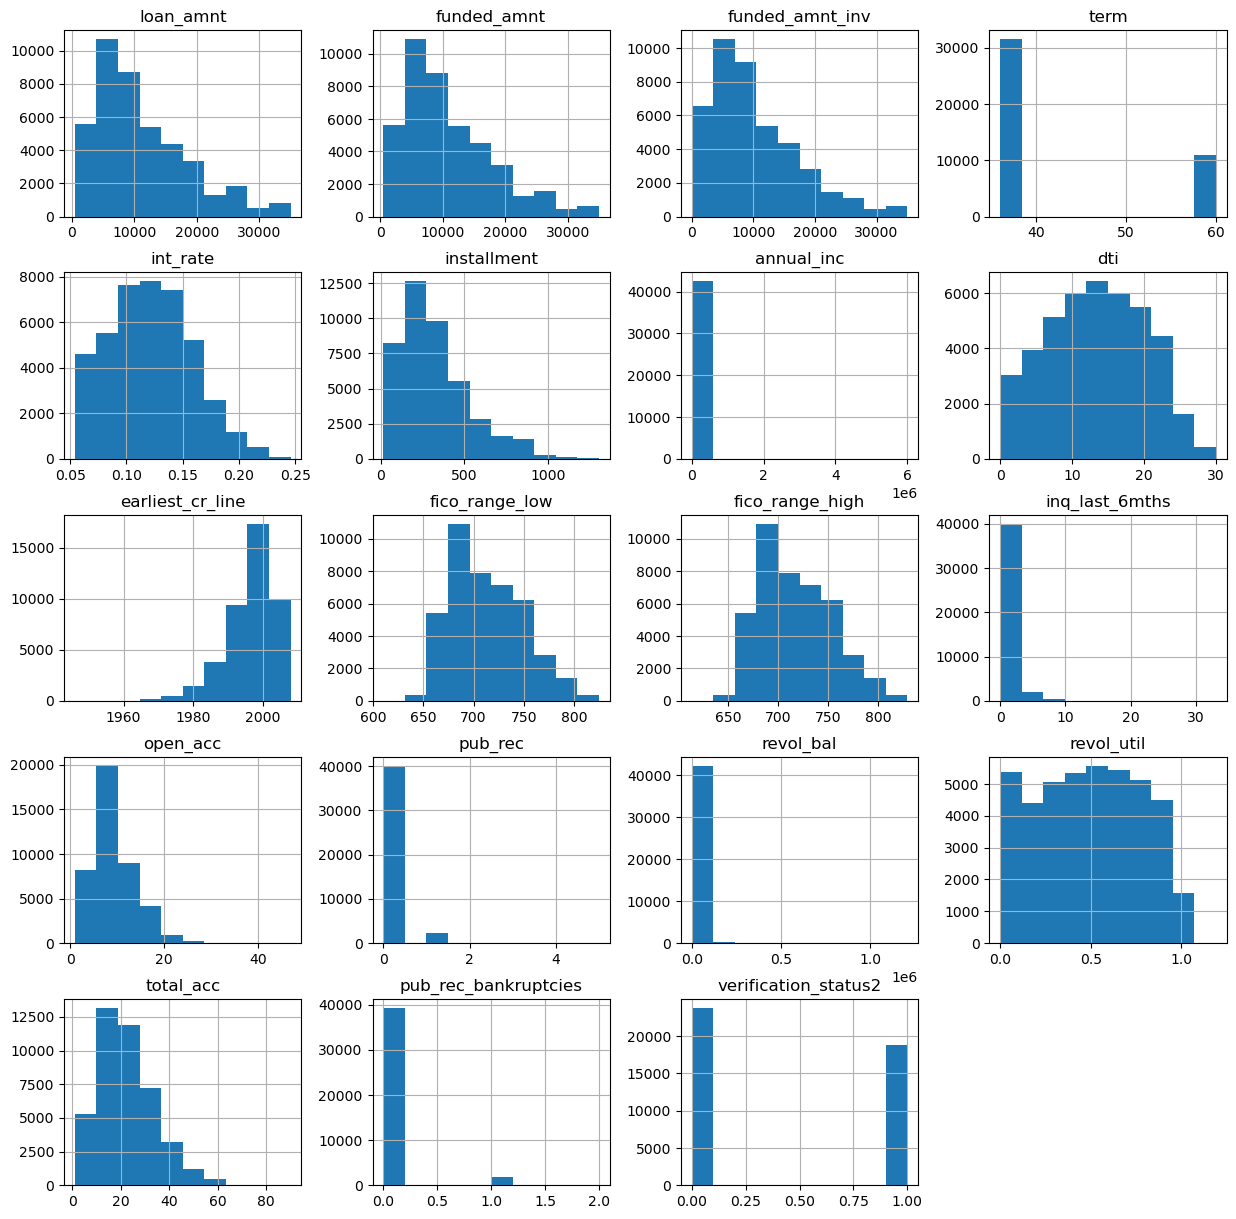

In [82]:
df.hist(figsize=(15,15))

In [83]:
#Uzupełniam brakujące wartości - na podstawie histogramu decyduję, czy uzupełniam medianą, czy najczęściej występującą wartością

In [84]:
# Dane kategoryczne

# Będę je uzupełniać najczęściej występującą wartością
# Najczęściej występującą wartość 'term' to 36
# Najczęściej występującą wartość 'grade' to B
# Najczęściej występującą wartość 'home_ownership' to 'RENT'
# Najczęściej występującą wartość 'purpose' to debt_consolidation'

In [85]:
#term
df['term'].value_counts()

36.000    31534
60.000    11001
Name: term, dtype: int64

In [86]:
df['term'].fillna(36.0, inplace=True)

In [87]:
#grade
df['grade'].value_counts()

B    12389
A    10183
C     8740
D     6016
E     3394
F     1301
G      512
Name: grade, dtype: int64

In [88]:
df['grade'].fillna('B', inplace=True)

In [89]:
#home_ownership
df['home_ownership'].value_counts()

RENT        20181
MORTGAGE    18959
OWN          3251
OTHER         136
NONE            8
Name: home_ownership, dtype: int64

In [90]:
df['home_ownership'].fillna('RENT', inplace=True)

In [91]:
#purpose
df['purpose'].value_counts()

debt_consolidation    19776
credit_card            5477
other                  4425
home_improvement       3199
major_purchase         2311
small_business         1992
car                    1615
wedding                1004
medical                 753
moving                  629
house                   426
educational             422
vacation                400
renewable_energy        106
Name: purpose, dtype: int64

In [92]:
df['purpose'].fillna('debt_consolidation', inplace=True)

In [93]:
#loan_status
df['loan_status'].value_counts()

Fully Paid                                             34116
Charged Off                                             5670
Does not meet the credit policy. Status:Fully Paid      1988
Does not meet the credit policy. Status:Charged Off      761
Name: loan_status, dtype: int64

In [94]:
df['loan_status'].fillna('Fully Paid', inplace=True)

In [95]:
# Dane numeryczne
# Będę je uzupełniać medianą

In [96]:
#loan_amnt
df['loan_amnt'].fillna(df['loan_amnt'].median(), inplace=True)

In [97]:
#funded_amnt
df['funded_amnt'].fillna(df['funded_amnt'].median(), inplace=True)

In [98]:
#funded_amnt_inv
df['funded_amnt_inv'].fillna(df['funded_amnt_inv'].median(), inplace=True)

In [99]:
#int_rate
df['int_rate'].fillna(df['int_rate'].median(), inplace=True)

In [100]:
#installment
df['installment'].fillna(df['installment'].median(), inplace=True)

In [101]:
#emp_length
df['emp_length'].fillna(df['emp_length'].median(), inplace=True)

In [102]:
#annual_inc
df['annual_inc'].fillna(df['annual_inc'].median(), inplace=True)

In [103]:
#dti
df['dti'].fillna(df['dti'].median(), inplace=True)

In [104]:
#fico_range_low
df['fico_range_low'].fillna(df['fico_range_low'].median(), inplace=True)

In [105]:
#fico_range_high
df['fico_range_high'].fillna(df['fico_range_high'].median(), inplace=True)

In [106]:
#inq_last_6mths
df['emp_length'].fillna(df['emp_length'].median(), inplace=True)

In [107]:
#open_acc
df['open_acc'].fillna(df['open_acc'].median(), inplace=True)

In [108]:
#pub_rec
df['pub_rec'].fillna(df['pub_rec'].median(), inplace=True)

In [109]:
#revol_bal
df['revol_bal'].fillna(df['revol_bal'].median(), inplace=True)

In [110]:
#revol_util
df['revol_util'].fillna(df['revol_util'].median(), inplace=True)

In [111]:
#total_acc
df['total_acc'].fillna(df['total_acc'].median(), inplace=True)

In [112]:
#pub_rec_bankruptcies
df['pub_rec_bankruptcies'].fillna(df['pub_rec_bankruptcies'].median(), inplace=True)

In [113]:
#earliest_cr_line
df['earliest_cr_line'].fillna(df['earliest_cr_line'].median(), inplace=True)

In [114]:
#inq_last_6mths
df['inq_last_6mths'].fillna(df['inq_last_6mths'].median(), inplace=True)

In [115]:
df.isna().sum()

loan_amnt               0
funded_amnt             0
funded_amnt_inv         0
term                    0
int_rate                0
installment             0
grade                   0
emp_length              0
home_ownership          0
annual_inc              0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
fico_range_low          0
fico_range_high         0
inq_last_6mths          0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
pub_rec_bankruptcies    0
verification_status2    0
dtype: int64

# EDA

### Kolumna ze statusem pożyczki

In [116]:
# Zmienną objaśnianą jest kolumna ze statusem pożyczki - 'loan_status. Zadaniem jest przewidzenie, 
# czy klient spłaci kredyt - 1, czy nie spłaci - 0

In [117]:
df['loan_status'].value_counts()

Fully Paid                                             34117
Charged Off                                             5670
Does not meet the credit policy. Status:Fully Paid      1988
Does not meet the credit policy. Status:Charged Off      761
Name: loan_status, dtype: int64

In [118]:
#zamieniam wartości "loan_status" na dwie wartości 0 i 1. 

In [119]:
df['niesplacony_splacony'] = np.where(df['loan_status'].isin(
    ['Charged Off','Does not meet the credit policy. Status:Charged Off']), 0, 1)

In [120]:
df['niesplacony_splacony'].value_counts()

1    36105
0     6431
Name: niesplacony_splacony, dtype: int64

In [121]:
#usuwam pierwotną kolumnę loan_status
df.drop(columns = ['loan_status'], inplace = True)

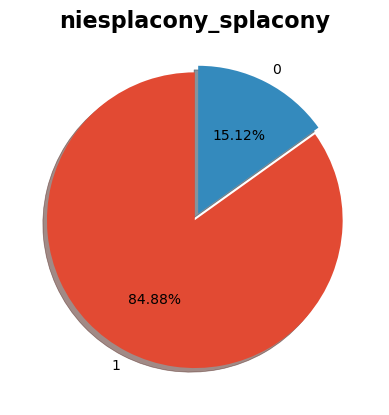

In [122]:
#Chcę sprawdzić, jaki rozkład ma zmienna dotycząca spłaty pożyczki. 

plt.style.use('ggplot')

data = df['niesplacony_splacony'].value_counts(normalize=True)
plt.pie(data, labels=data.index, startangle = 90, shadow = True, radius=1, explode= [0,0.05],autopct='%0.2f%%')
plt.title('niesplacony_splacony', fontsize=16, fontweight='bold')
plt.show()

In [123]:
#Dane są niezbalansowane - prawie 85% stanowią spłacone pożyczki, niespłacone zaledwie 15%.

### Rozkład zmiennych , korelacje

In [124]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

print('Liczba {} zmiennych numerycznych : {}'.format(len(numeric_features), numeric_features))
print('\nLiczba {} zmiennych kategorycznych : {}'.format(len(categorical_features), categorical_features))

Liczba 20 zmiennych numerycznych : ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'annual_inc', 'dti', 'earliest_cr_line', 'fico_range_low', 'fico_range_high', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'pub_rec_bankruptcies', 'verification_status2', 'niesplacony_splacony']

Liczba 4 zmiennych kategorycznych : ['grade', 'emp_length', 'home_ownership', 'purpose']


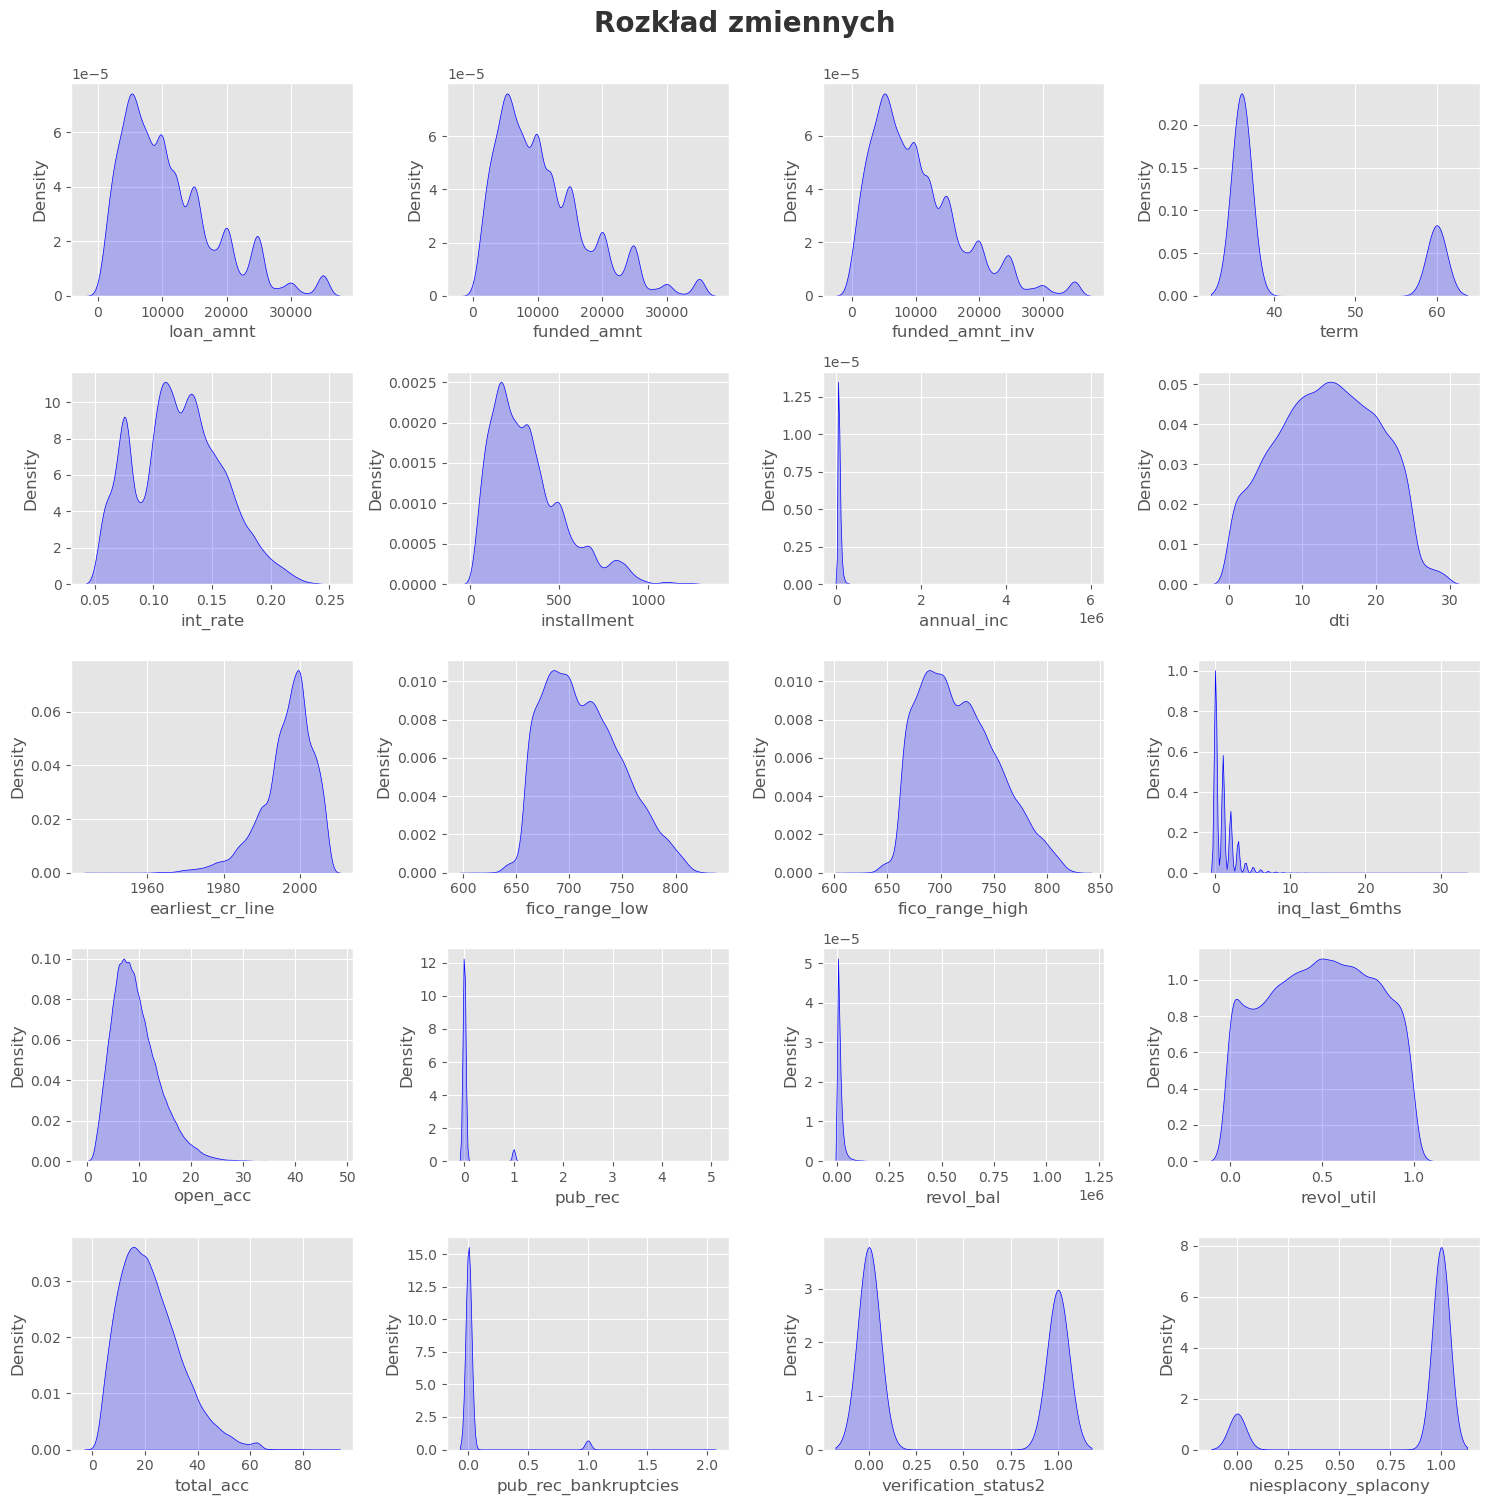

In [125]:
plt.figure(figsize=(15, 15))
plt.suptitle('Rozkład zmiennych', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numeric_features)):
    plt.subplot(5, 4, i+1)
    sns.kdeplot(x=df[numeric_features[i]],shade=True, color='b')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

In [126]:
# Km_driven, max_power, selling_price, and engine are right skewed and postively skewed.
# Outliers in km_driven, enginer, selling_price, and max power.

In [127]:
#Sprawdzam korelację między poszczególnymi wartościami

In [128]:
cor=df.corr()
cor

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,annual_inc,dti,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies,verification_status2,niesplacony_splacony
loan_amnt,1.000,0.982,0.930,0.356,0.292,0.931,0.276,0.065,-0.191,0.133,0.133,-0.030,0.177,-0.051,0.254,0.065,0.257,-0.035,-0.323,-0.043
funded_amnt,0.982,1.000,0.948,0.335,0.295,0.957,0.272,0.065,-0.185,0.126,0.126,-0.030,0.175,-0.052,0.250,0.069,0.251,-0.037,-0.318,-0.040
funded_amnt_inv,0.930,0.948,1.000,0.364,0.280,0.890,0.252,0.071,-0.169,0.145,0.145,-0.075,0.156,-0.055,0.212,0.070,0.241,-0.037,-0.352,-0.010
term,0.356,0.335,0.364,1.000,0.429,0.098,0.043,0.077,-0.047,0.000,0.000,-0.013,0.046,0.005,0.029,0.065,0.095,0.015,-0.254,-0.134
int_rate,0.292,0.295,0.280,0.429,1.000,0.271,0.054,0.120,0.116,-0.703,-0.703,0.179,0.025,0.100,0.082,0.456,-0.032,0.085,-0.170,-0.201
installment,0.931,0.957,0.890,0.098,0.271,1.000,0.278,0.055,-0.169,0.064,0.064,-0.011,0.175,-0.046,0.265,0.094,0.234,-0.032,-0.268,-0.021
annual_inc,0.276,0.272,0.252,0.043,0.054,0.278,1.000,-0.117,-0.189,0.052,0.052,0.028,0.168,-0.016,0.284,0.021,0.246,-0.015,-0.106,0.038
dti,0.065,0.065,0.071,0.077,0.120,0.055,-0.117,1.000,-0.055,-0.191,-0.191,0.014,0.298,-0.003,0.191,0.279,0.241,0.010,-0.036,-0.042
earliest_cr_line,-0.191,-0.185,-0.169,-0.047,0.116,-0.169,-0.189,-0.055,1.000,-0.235,-0.235,0.004,-0.236,-0.052,-0.240,0.041,-0.387,-0.058,0.026,-0.020
fico_range_low,0.133,0.126,0.145,0.000,-0.703,0.064,0.052,-0.191,-0.235,1.000,1.000,-0.136,-0.026,-0.152,-0.022,-0.543,0.111,-0.124,-0.006,0.142


<AxesSubplot:>

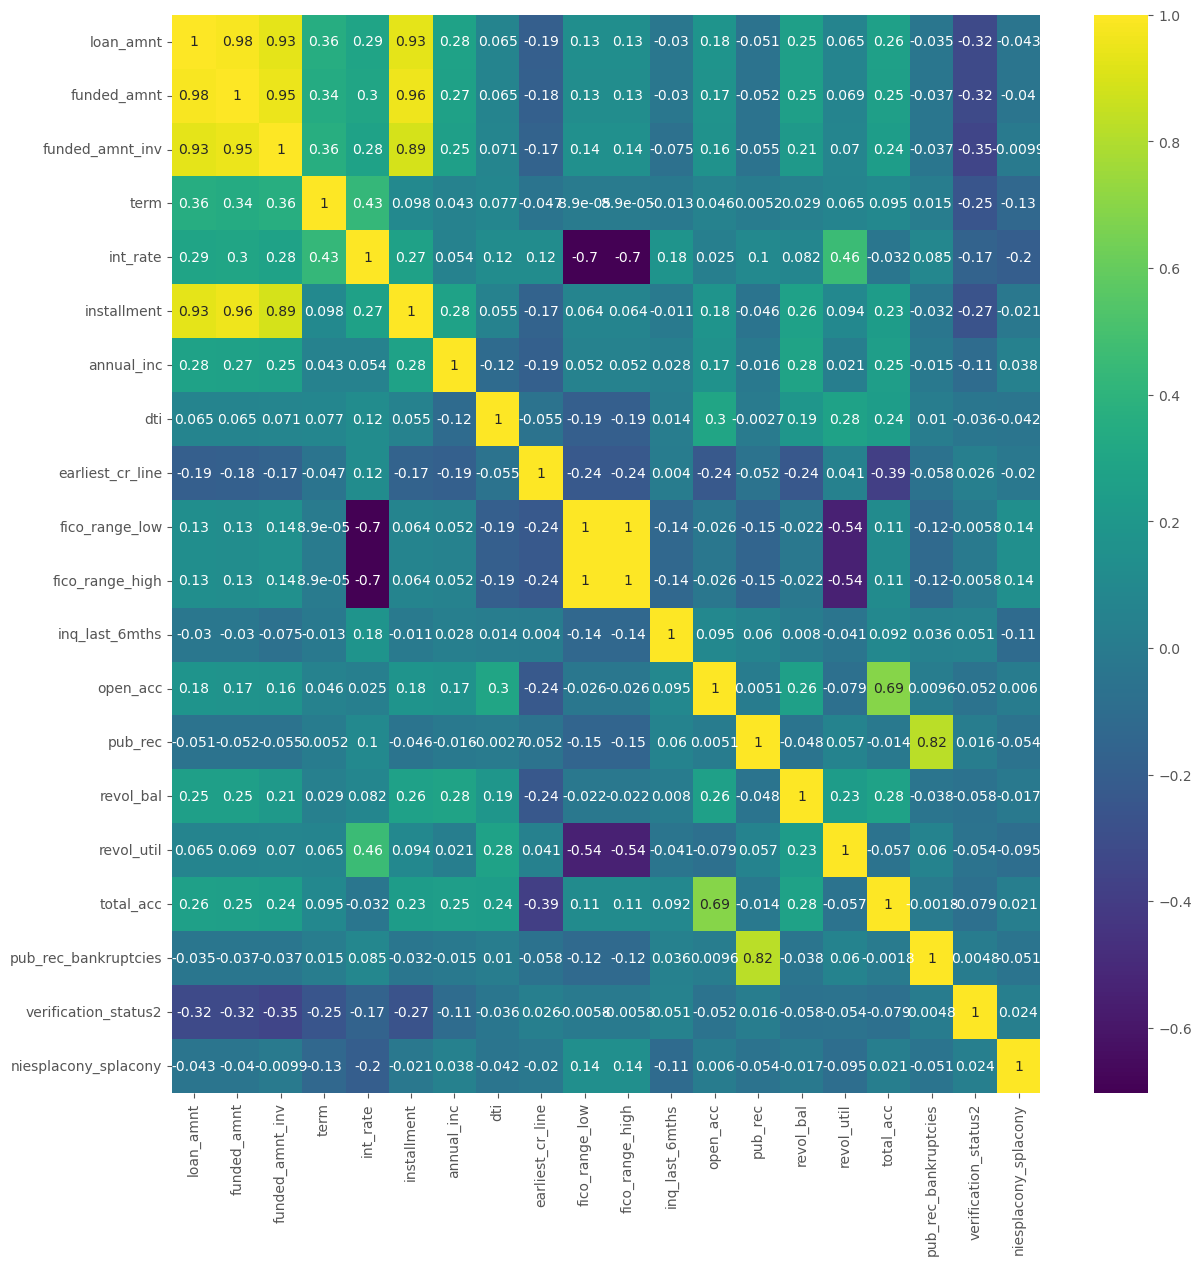

In [129]:
plt.figure(figsize=(14, 14))
sns.heatmap(df.corr(), annot=True, cmap='viridis')

In [130]:
#Najlepiej skorelowane z daną wyjściową są: 'fico range high' oraz 'fico range low', 
#najbardziej odwrotnie skoelowane są 'int_rate', 'term'.

In [131]:
#Wartości 'funded_amnt' i 'funded_amnt_inv' są silnie skorelowane ze sobą oraz wartością 'loan_amnt'. 
#Przedstawiają tę samą informację w różny sposób, dlatego decyduję się je usunąć.

In [132]:
df.drop(columns = ['funded_amnt', 'funded_amnt_inv'], inplace = True)

In [133]:

# Z tabeli wynika, że osoby mające problemy ze spłatą kredytu mają niższy roczny dochód, wyższy wskaźnik dti (jaki procent zarobków stanowi rata kredytu)
# mają niższe wskaźniki fico, wyższe oprocentowanie kredytu. Płacą też wyższe raty.

pd.pivot_table(df, index='niesplacony_splacony', aggfunc='mean')

,annual_inc,dti,earliest_cr_line,fico_range_high,fico_range_low,inq_last_6mths,installment,int_rate,loan_amnt,open_acc,pub_rec,pub_rec_bankruptcies,revol_bal,revol_util,term,total_acc,verification_status2
niesplacony_splacony,,,,,,,,,,,,,,,,,
0,63366.871,14.046,1996.906,704.884,700.884,1.483,333.065,0.139,11837.428,9.280,0.089,0.068,15194.459,0.555,45.535,21.544,0.413
1,70162.845,13.253,1996.526,719.220,715.220,1.010,320.762,0.119,10956.503,9.355,0.053,0.039,14138.008,0.480,41.614,22.226,0.446


In [134]:
#Do analizy wybrałam kolumny: 'int_rate', 'annual_inc', 'dti', 
#'loan_amnt', 'term', 'installment', 'home_ownership', 'grade', 'fico range high', 'fico range low', 'purpose'

In [135]:
#Funkcje, których będę używała do obliczeń dla wybranych zmiennych

In [136]:
def statystyka (df, zmienna):
    '''
    Ta funkcja oblicza podstawowe statystyki dla poszczegolnych zmiennych ze zbioru df
    '''
    print('Minimum: ', df[zmienna].min())
    print('Maximum: ',df[zmienna].max())
    print('Mean value: ', df[zmienna].mean())
    print('Median value: ',df[zmienna].median())
    print('Standard deviation: ', df[zmienna].std())

In [137]:
def kwartyle(df, zmienna):
    Q1=df[zmienna].quantile(q=0.25)
    Q3=df[zmienna].quantile(q=0.75)
    print('1st Quartile (Q1) is: ', Q1)
    print('3st Quartile (Q3) is: ', Q3)
    print('Interquartile range (IQR) is ', stats.iqr(df[zmienna]))

In [138]:
def gorny_dolny_outlier(dr, zmienna, Q1, Q3):
    '''
    Ta funkcja wylicza zakres od 1. do 3. kwartyla. Powyżej 3. kwartyla wartości należą do outlierow
    '''
    L_outliers=Q1-1.5*(Q3-Q1)
    U_outliers=Q3+1.5*(Q3-Q1)
    print('Lower outliers: ', L_outliers)
    print('Upper outliers: ', U_outliers)

In [139]:
def liczba_outlierow (df, wartosc, upper_out, lower_out):
    '''
    Ta funkcja będzie pokazywała liczbę outlierow oraz ich procentowy udział
    '''
    print('Liczba outlierow upper : ', df[df[wartosc]>upper_out][wartosc].count())
    print('Liczba outlierow lower : ', df[df[wartosc]<lower_out][wartosc].count())
    print('% outlierow upper: ',(df[df[wartosc]>upper_out][wartosc].count()*100/len(df)), '%')
    print('% outlierow lower: ',(df[df[wartosc]<lower_out][wartosc].count()*100/len(df)), '%')

## Zmienne numeryczne

### INTEREST RATE

In [140]:
statystyka(df, 'int_rate')

Minimum:  0.0542
Maximum:  0.2459
Mean value:  0.12165011519652409
Median value:  0.1199
Standard deviation:  0.037078920181680304


In [141]:
kwartyle(df, 'int_rate')

1st Quartile (Q1) is:  0.09630000000000001
3st Quartile (Q3) is:  0.1472
Interquartile range (IQR) is  0.05089999999999999


In [142]:
gorny_dolny_outlier(df,'int_rate', 0.097, 0.15)

Lower outliers:  0.017500000000000016
Upper outliers:  0.22949999999999998


In [143]:
liczba_outlierow(df, 'int_rate', 0.224, 0.02)

Liczba outlierow upper :  94
Liczba outlierow lower :  0
% outlierow upper:  0.22098927966898627 %
% outlierow lower:  0.0 %


D:\anaconda\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


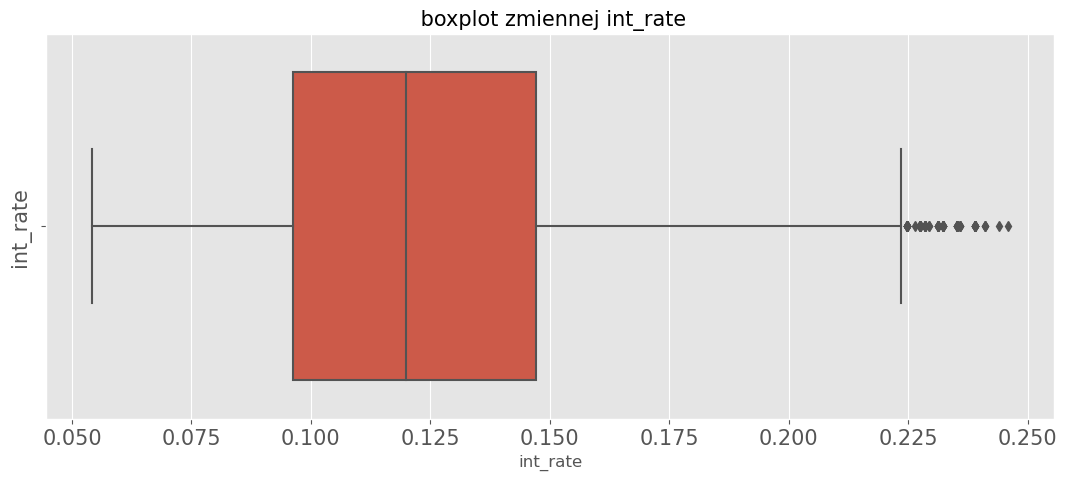

In [144]:
fig, (ax1)=plt.subplots(figsize=(13,5))


sns.boxplot(x='int_rate',data=df,orient='v',ax=ax1)
ax1.set_ylabel('int_rate', fontsize=15)
ax1.set_title(' boxplot zmiennej int_rate', fontsize=15)
ax1.tick_params(labelsize=15)

In [145]:
#Z tych danych wynika, że osoby niespłacające kredytów otrzymują wyższe oprocentowanie (średnio)

pd.pivot_table(df, index='niesplacony_splacony', values="int_rate", aggfunc='mean')

,int_rate
niesplacony_splacony,
0,0.139
1,0.119


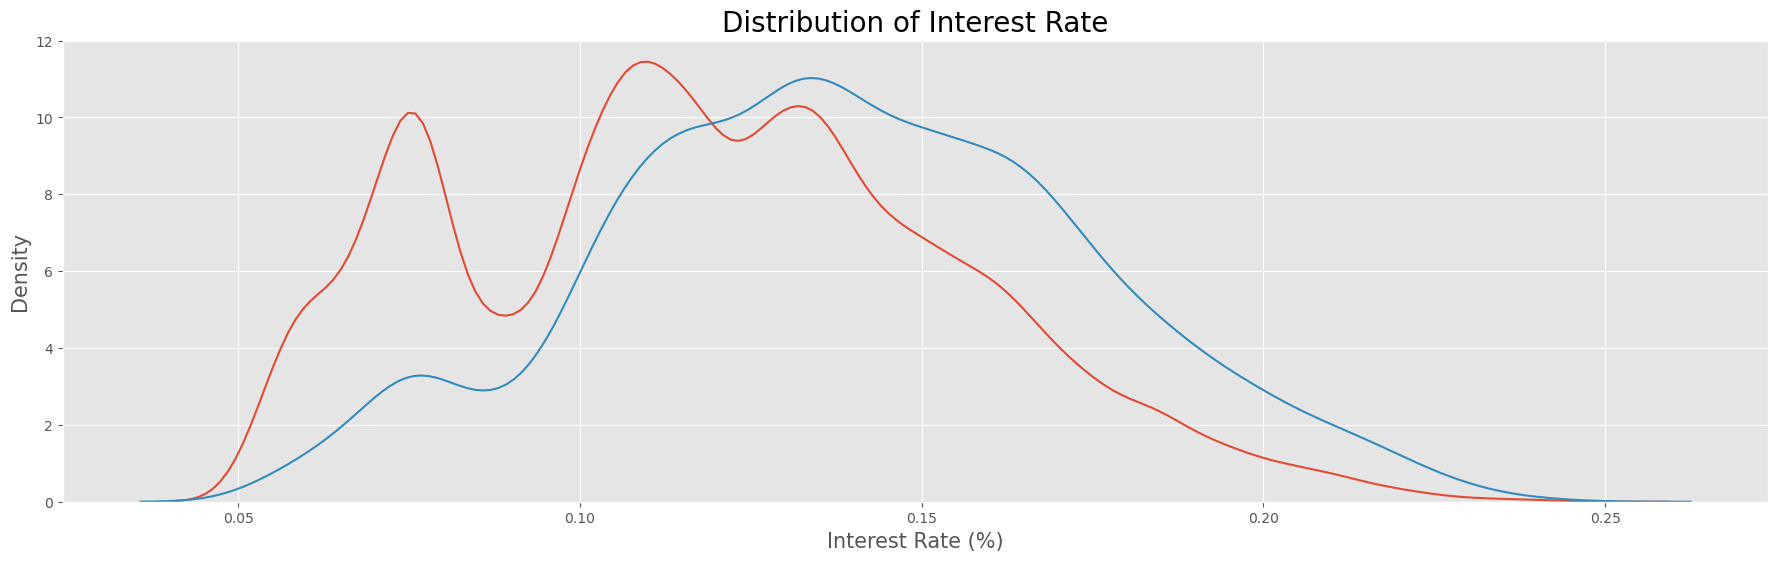

In [146]:
fig = plt.figure(figsize=(22,6))
sns.kdeplot(df.loc[df['niesplacony_splacony'] == 1, 'int_rate'], label = 'target = 1')
sns.kdeplot(df.loc[df['niesplacony_splacony'] == 0, 'int_rate'], label = 'target = 0');
plt.xlabel('Interest Rate (%)',fontsize=15)
plt.ylabel('Density',fontsize=15)
plt.title('Distribution of Interest Rate',fontsize=20);

In [147]:
#Im niższa klasa, tym wyższe oprocentowanie kredytu. Różnice między nie- i spłacającymi są minimalne

pd.pivot_table(df, index='niesplacony_splacony',columns="grade", values='int_rate', aggfunc='mean')

grade,A,B,C,D,E,F,G
niesplacony_splacony,,,,,,,
0,0.076,0.111,0.135,0.156,0.175,0.194,0.204
1,0.073,0.110,0.135,0.156,0.174,0.192,0.205


### ANNUAL INCOME

In [148]:
statystyka(df, 'annual_inc')

Minimum:  1896.0
Maximum:  6000000.0
Mean value:  69135.36489350203
Median value:  59000.0
Standard deviation:  64092.676551074255


In [149]:
kwartyle(df, 'annual_inc')

1st Quartile (Q1) is:  40000.0
3st Quartile (Q3) is:  82500.0
Interquartile range (IQR) is  42500.0


In [150]:
gorny_dolny_outlier(df, 'annual_inc', 40000, 82500)

Lower outliers:  -23750.0
Upper outliers:  146250.0


In [151]:
liczba_outlierow(df, 'annual_inc', 146250, -23750)

Liczba outlierow upper :  2032
Liczba outlierow lower :  0
% outlierow upper:  4.777129960504044 %
% outlierow lower:  0.0 %


D:\anaconda\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


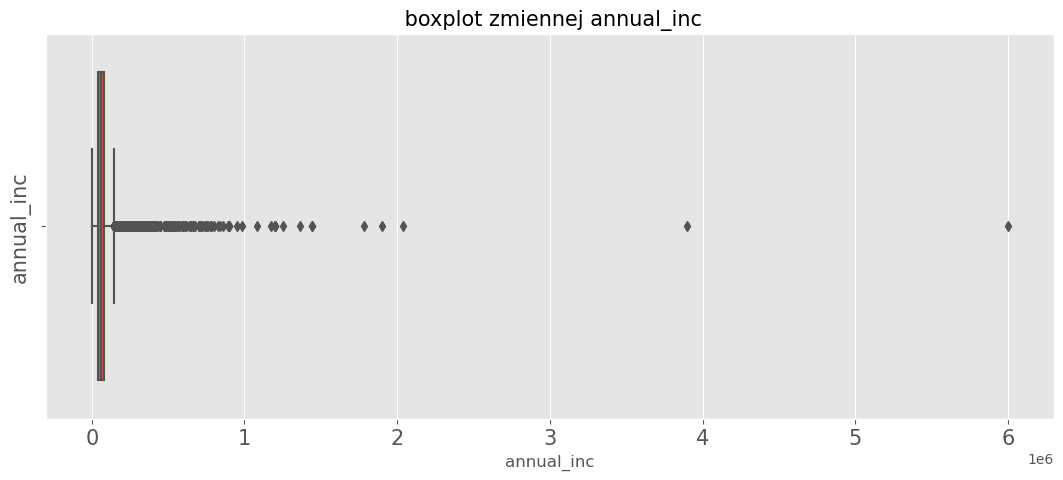

In [152]:
fig, (ax1)=plt.subplots(figsize=(13,5))


sns.boxplot(x='annual_inc',data=df,orient='v',ax=ax1)
ax1.set_ylabel('annual_inc', fontsize=15)
ax1.set_title(' boxplot zmiennej annual_inc', fontsize=15)
ax1.tick_params(labelsize=15)

In [153]:
df.corr()['annual_inc'].sort_values().tail(10)

term              0.043
fico_range_high   0.052
fico_range_low    0.052
int_rate          0.054
open_acc          0.168
total_acc         0.246
loan_amnt         0.276
installment       0.278
revol_bal         0.284
annual_inc        1.000
Name: annual_inc, dtype: float64

In [154]:
#Zmienna 'annual_inc' jest wysoko pozytywnie skorelowana ze zmiennymi 'loan_amnt' i 'installment'

In [155]:
pd.pivot_table(df, index='niesplacony_splacony', values="annual_inc", aggfunc='mean')

,annual_inc
niesplacony_splacony,
0,63366.871
1,70162.845


In [156]:
#Osoby niespłacające mają niższe roczne dochody

### DTi

In [157]:
#Jest to wskaźnik pokazujący, jaką część miesięcznych zarobków kredytobiorcy stanowi rata kredytu. 

In [158]:
statystyka(df, 'dti')

Minimum:  0.0
Maximum:  29.99
Mean value:  13.373045420349804
Median value:  13.47
Standard deviation:  6.7262358496920145


In [159]:
kwartyle(df, 'dti')

1st Quartile (Q1) is:  8.2
3st Quartile (Q3) is:  18.68
Interquartile range (IQR) is  10.48


In [160]:
gorny_dolny_outlier(df, 'dti', 8.2, 10.48)

Lower outliers:  4.779999999999998
Upper outliers:  13.900000000000002


In [161]:
liczba_outlierow(df, 'dti', 13.90, 4.78)

Liczba outlierow upper :  20320
Liczba outlierow lower :  5217
% outlierow upper:  47.77129960504043 %
% outlierow lower:  12.264905021628739 %


D:\anaconda\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


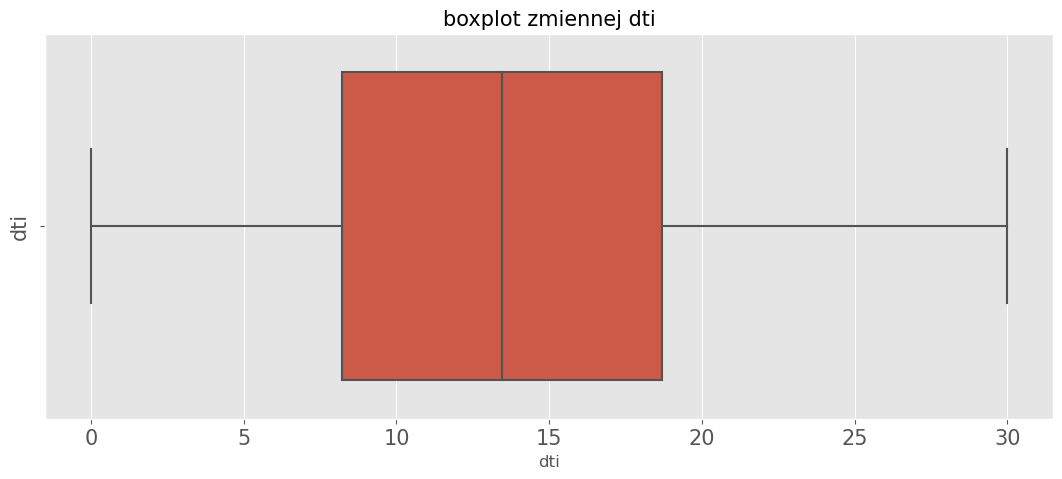

In [162]:
fig, (ax1)=plt.subplots(figsize=(13,5))

#boxplot
sns.boxplot(x='dti',data=df,orient='v',ax=ax1)
ax1.set_ylabel('dti', fontsize=15)
ax1.set_title('boxplot zmiennej dti', fontsize=15)
ax1.tick_params(labelsize=15)

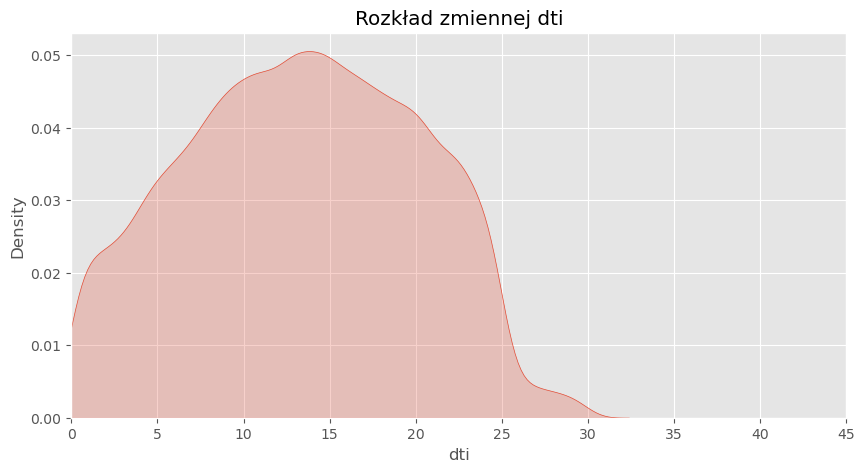

In [163]:
dti = df['dti']
plt.figure(figsize=(10,5))
plt.xlim(0, 45)
plt.title('Rozkład zmiennej dti')
sns.kdeplot(dti , shade=True)
plt.show()

In [164]:
pd.pivot_table(df, index='niesplacony_splacony', values='dti', aggfunc='mean')

,dti
niesplacony_splacony,
0,14.046
1,13.253


In [165]:
#Osoby niespłacające mają wyższy wskażnik dti - stosunek zobowiązań do dochodów

### LOAN AMOUNT

In [166]:
statystyka(df, 'loan_amnt')

Minimum:  500.0
Maximum:  35000.0
Mean value:  11089.68990972353
Median value:  9700.0
Standard deviation:  7410.8543376499565


In [167]:
kwartyle(df, 'loan_amnt')

1st Quartile (Q1) is:  5200.0
3st Quartile (Q3) is:  15000.0
Interquartile range (IQR) is  9800.0


In [168]:
gorny_dolny_outlier(df, 'loan_amnt', 5200, 15000)

Lower outliers:  -9500.0
Upper outliers:  29700.0


In [169]:
liczba_outlierow(df, 'loan_amnt', 29700, -9500)

Liczba outlierow upper :  1218
Liczba outlierow lower :  0
% outlierow upper:  2.863456836561971 %
% outlierow lower:  0.0 %


D:\anaconda\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


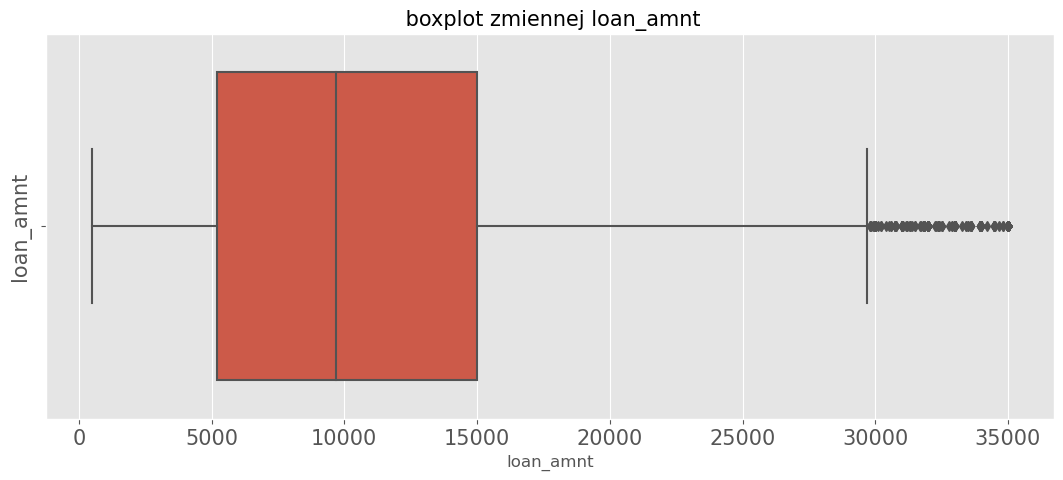

In [170]:
fig, (ax1)=plt.subplots(figsize=(13,5))

#boxplot
sns.boxplot(x='loan_amnt',data=df,orient='v',ax=ax1)
ax1.set_ylabel('loan_amnt', fontsize=15)
ax1.set_title(' boxplot zmiennej loan_amnt', fontsize=15)
ax1.tick_params(labelsize=15)

<AxesSubplot:xlabel='loan_amnt', ylabel='count'>

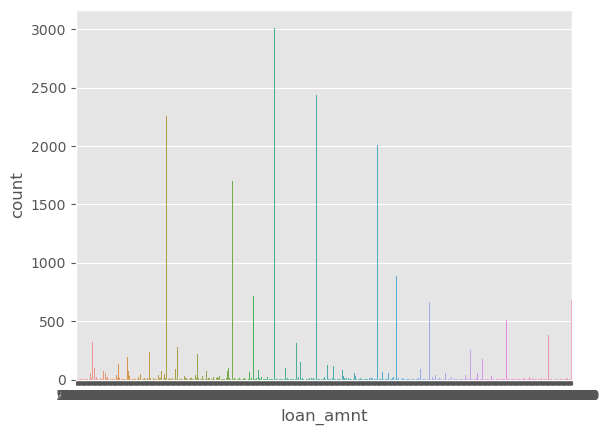

In [171]:
sns.countplot(x='loan_amnt',data=df)

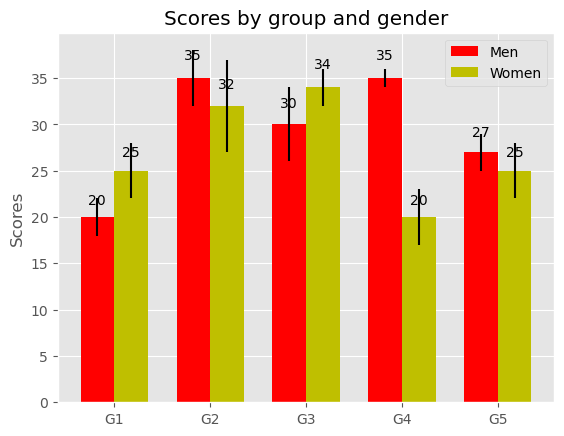

In [172]:
N = 5
men_means = (20, 35, 30, 35, 27)
men_std = (2, 3, 4, 1, 2)

ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind, men_means, width, color='r', yerr=men_std)

women_means = (25, 32, 34, 20, 25)
women_std = (3, 5, 2, 3, 3)
rects2 = ax.bar(ind + width, women_means, width, color='y', yerr=women_std)

# add some text for labels, title and axes ticks
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('G1', 'G2', 'G3', 'G4', 'G5'))

ax.legend((rects1[0], rects2[0]), ('Men', 'Women'))


def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.show()

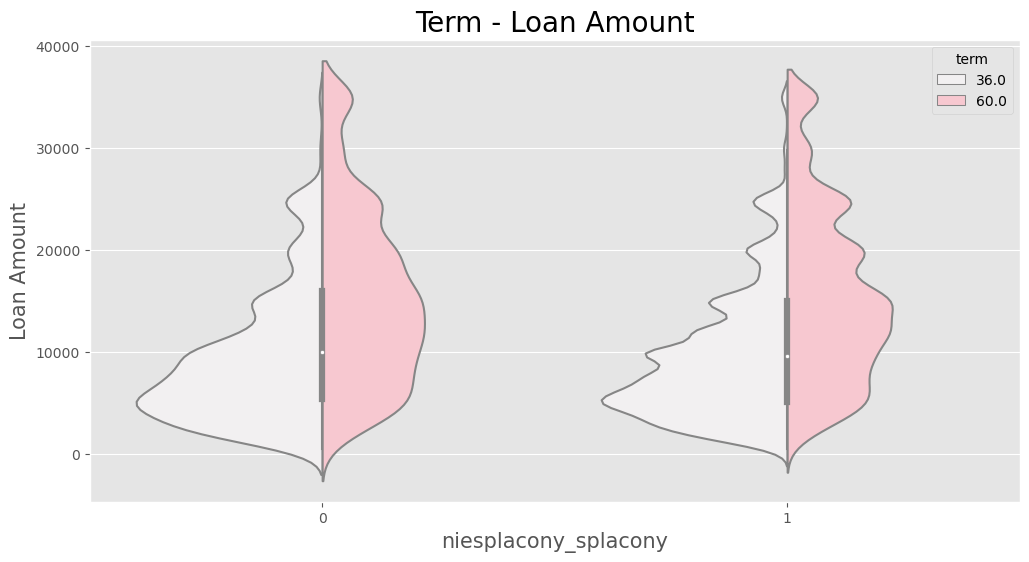

In [173]:
fig = plt.figure(figsize=(12,6))
sns.violinplot(x="niesplacony_splacony",y="loan_amnt",data=df, hue="term", split=True,color='pink')
plt.title("Term - Loan Amount", fontsize=20)
plt.xlabel("niesplacony_splacony", fontsize=15)
plt.ylabel("Loan Amount", fontsize=15);

In [174]:
#Widać, że osoby zaciągające kredyt na dłyższy okres (36mcy), zadłużają się na wyższe kwoty

<AxesSubplot:xlabel='grade', ylabel='loan_amnt'>

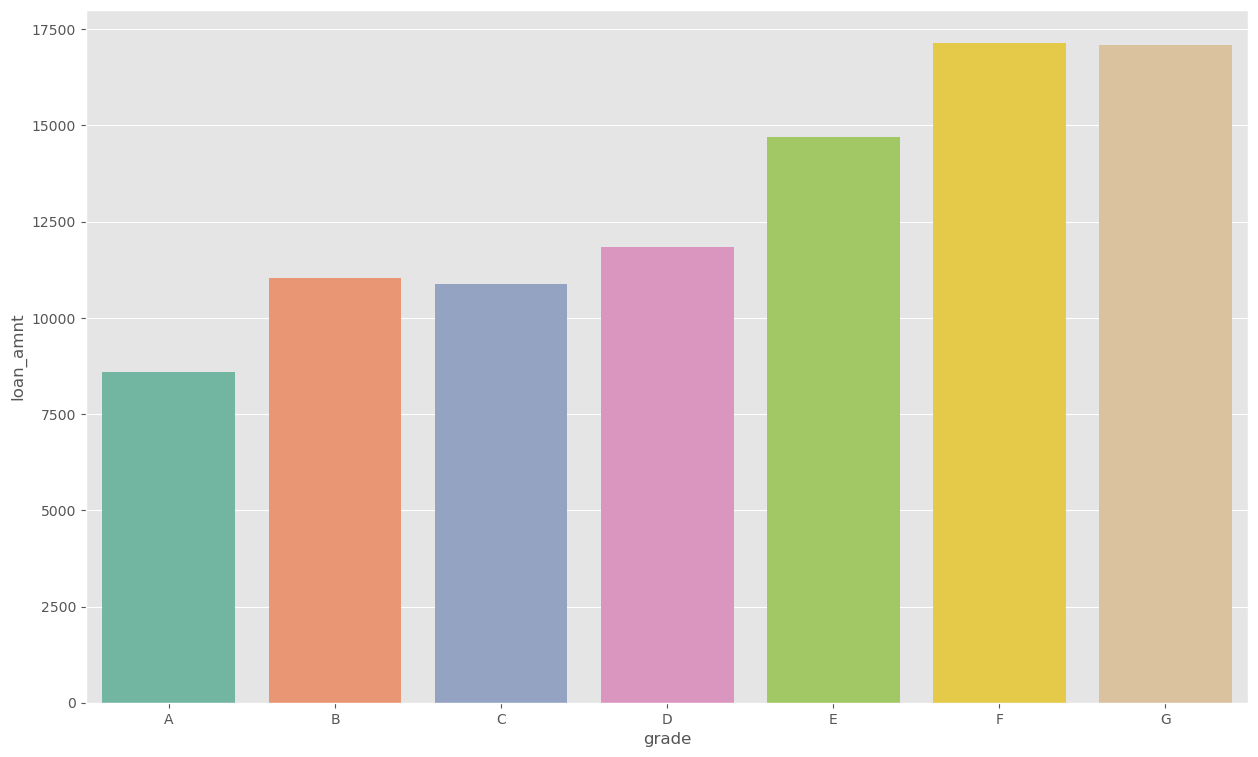

In [175]:
#Chcę sprawdzić, jak wyglądają kwoty kredytu dla poszczólnych grup (zmienna 'grade')

group = df.groupby("grade").mean()
avg_loan = group['loan_amnt'].reset_index()
plt.subplots(figsize=(15,9))
sns.barplot(x='grade', y='loan_amnt', data=avg_loan, palette='Set2')

In [176]:
#Osoby z grupy najwyższego ryzyka (G) zadłużają się na wyższe kwoty. Im wyższa grupa ryzyka, tym większe kwoty kredytu

### INSTALLMENT

In [177]:
statystyka(df, 'installment')

Minimum:  15.67
Maximum:  1305.19
Mean value:  322.6220063005406
Median value:  277.69
Standard deviation:  208.92487412535752


In [178]:
kwartyle(df, 'installment')

1st Quartile (Q1) is:  165.53500000000003
3st Quartile (Q3) is:  428.155
Interquartile range (IQR) is  262.61999999999995


In [179]:
gorny_dolny_outlier(df, 'installment', 165.54, 428.16)

Lower outliers:  -228.39000000000001
Upper outliers:  822.09


In [180]:
liczba_outlierow(df, 'installment', 822, -228.4)

Liczba outlierow upper :  1393
Liczba outlierow lower :  0
% outlierow upper:  3.2748730487116795 %
% outlierow lower:  0.0 %


D:\anaconda\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


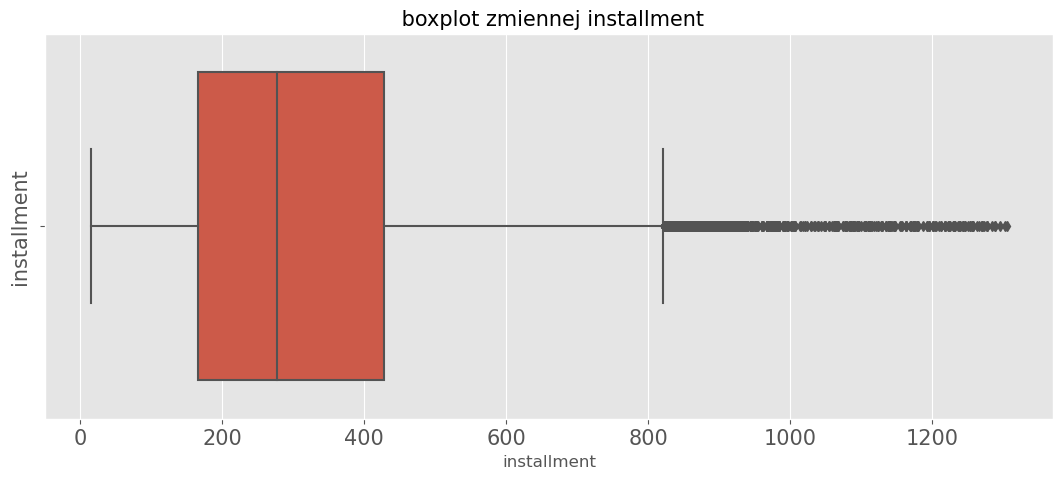

In [181]:
fig, (ax1)=plt.subplots(figsize=(13,5))


sns.boxplot(x='installment',data=df,orient='v',ax=ax1)
ax1.set_ylabel('installment', fontsize=15)
ax1.set_title(' boxplot zmiennej installment', fontsize=15)
ax1.tick_params(labelsize=15)

In [182]:
#Kredytobiorcy, którzy niespłacają kredytów mają nieco wyższe raty kredytu.

pd.pivot_table(df, index='niesplacony_splacony', values="installment", aggfunc='mean')

,installment
niesplacony_splacony,
0,333.065
1,320.762


### INQUIERIES IN THE LAST 6 MONTHS

In [183]:
statystyka(df, 'inq_last_6mths')

Minimum:  0.0
Maximum:  33.0
Mean value:  1.0813663720142939
Median value:  1.0
Standard deviation:  1.5269176123050658


In [184]:
kwartyle(df, 'inq_last_6mths')

1st Quartile (Q1) is:  0.0
3st Quartile (Q3) is:  2.0
Interquartile range (IQR) is  2.0


In [185]:
gorny_dolny_outlier(df, 'inq_last_6mths', 0.0, 2.0)

Lower outliers:  -3.0
Upper outliers:  5.0


In [186]:
liczba_outlierow(df, 'inq_last_6mths', 5.0, -3.0)

Liczba outlierow upper :  781
Liczba outlierow lower :  0
% outlierow upper:  1.836091781079556 %
% outlierow lower:  0.0 %


D:\anaconda\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


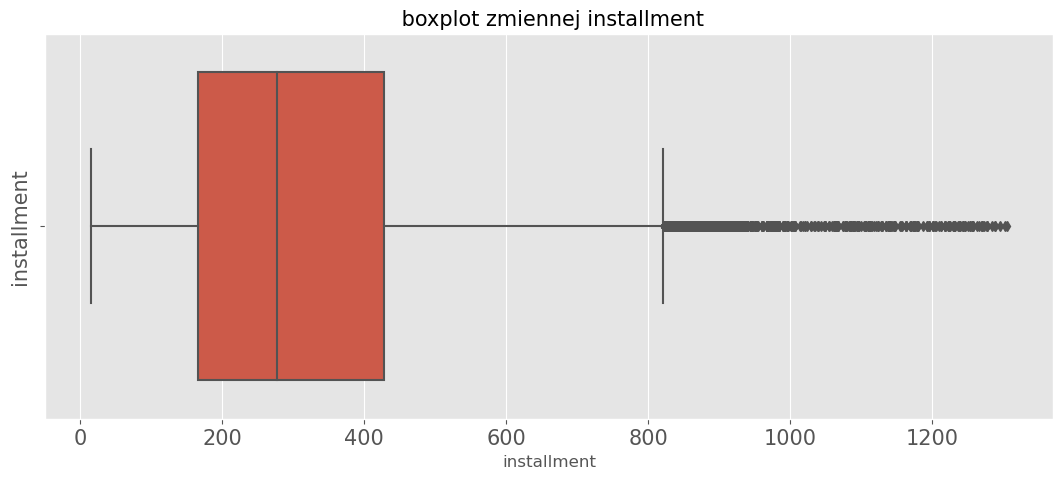

In [187]:
fig, (ax1)=plt.subplots(figsize=(13,5))


sns.boxplot(x='installment',data=df,orient='v',ax=ax1)
ax1.set_ylabel('installment', fontsize=15)
ax1.set_title(' boxplot zmiennej installment', fontsize=15)
ax1.tick_params(labelsize=15)

<AxesSubplot:xlabel='grade', ylabel='inq_last_6mths'>

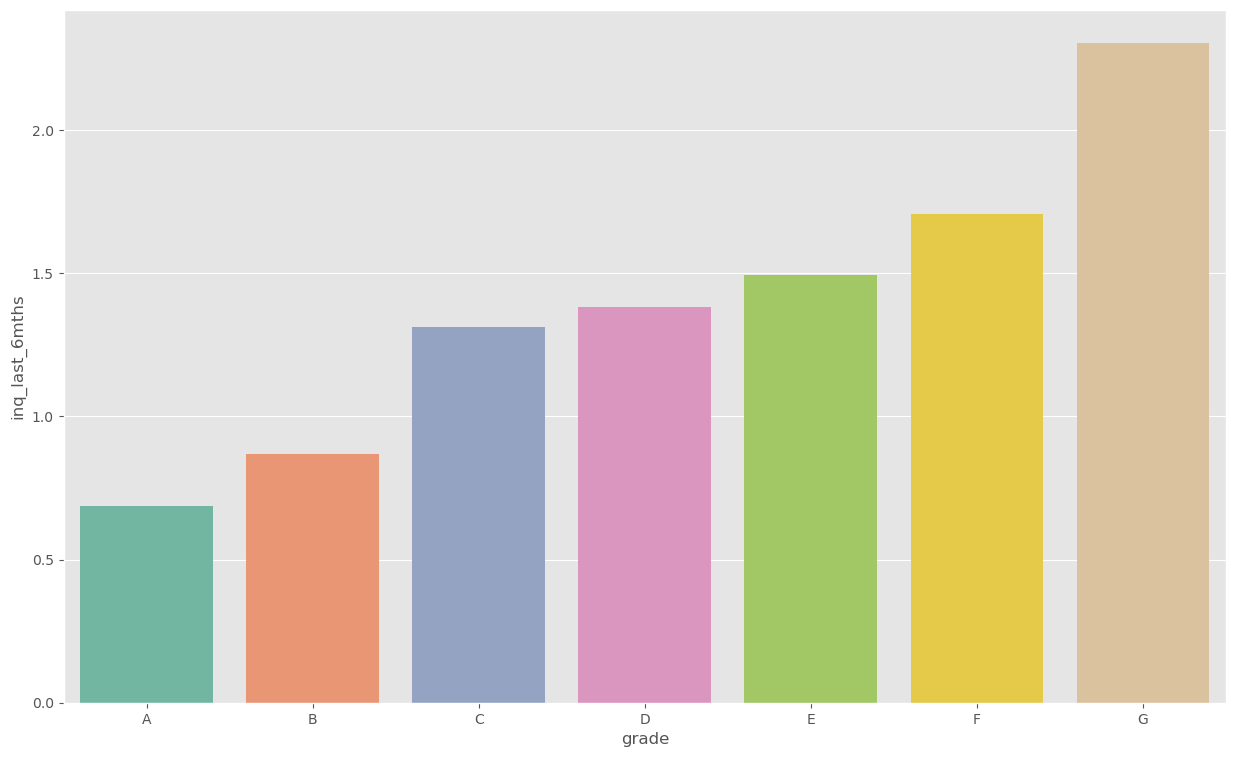

In [188]:
#Chcę sprawdzić, ile wniosków kredytowych składanych jest w poszcególnych grupach (zmienna 'grade')

group = df.groupby("grade").mean()
avg_loan = group['inq_last_6mths'].reset_index()
plt.subplots(figsize=(15,9))
sns.barplot(x='grade', y='inq_last_6mths', data=avg_loan, palette='Set2')

In [189]:
#Im wyższa grupa ryzyka, tym więcej wniosków kredytowych jest składanych

In [190]:
#Osoby częściej składające wnioski o przyznanie kredytu, częściej mają problemy z jego spłatą

pd.pivot_table(df, index='niesplacony_splacony', values='inq_last_6mths', aggfunc='mean')

,inq_last_6mths
niesplacony_splacony,
0,1.483
1,1.010


### FICO_RANGE_HIGH i FICO_RANGE_LOW

In [191]:
df[['fico_range_low','fico_range_high']].describe()

,fico_range_low,fico_range_high
count,42536.000,42536.000
mean,713.052,717.052
std,36.188,36.188
min,610.000,614.000
25%,685.000,689.000
50%,710.000,714.000
75%,740.000,744.000
max,825.000,829.000


In [192]:
#Wyniki dla obywdu zmiennych są bardzo podobne. 
#Sprawdzę korelację pomiędzy nimi

In [193]:
df[['fico_range_low','fico_range_high']].corr()

,fico_range_low,fico_range_high
fico_range_low,1.000,1.000
fico_range_high,1.000,1.000


In [194]:
#Zmienne są silnie skorelowane, więc do analizy potrzebuję tylko jednej. 
#Stworzę nową kolumnę 'fico', która będzie zawierała średnie wartości obydwu

In [195]:
df['fico'] = (df['fico_range_low'] + df['fico_range_high'])/2

In [196]:
df.drop(['fico_range_high', 'fico_range_low'], axis=1, inplace=True)

In [197]:
#Osoby niespłącające kredytów mają niższy wskaźnik FICO

pd.pivot_table(df, index='niesplacony_splacony', values='fico', aggfunc='mean')

,fico
niesplacony_splacony,
0,702.884
1,717.220


In [198]:
statystyka(df, 'fico')

Minimum:  612.0
Maximum:  827.0
Mean value:  715.0524731991725
Median value:  712.0
Standard deviation:  36.18801616454543


In [199]:
kwartyle(df, 'fico')

1st Quartile (Q1) is:  687.0
3st Quartile (Q3) is:  742.0
Interquartile range (IQR) is  55.0


In [200]:
gorny_dolny_outlier(df, 'fico',687, 742)

Lower outliers:  604.5
Upper outliers:  824.5


In [201]:
liczba_outlierow(df, 'fico', 824.5, 604.5)

Liczba outlierow upper :  3
Liczba outlierow lower :  0
% outlierow upper:  0.00705284935113786 %
% outlierow lower:  0.0 %


D:\anaconda\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


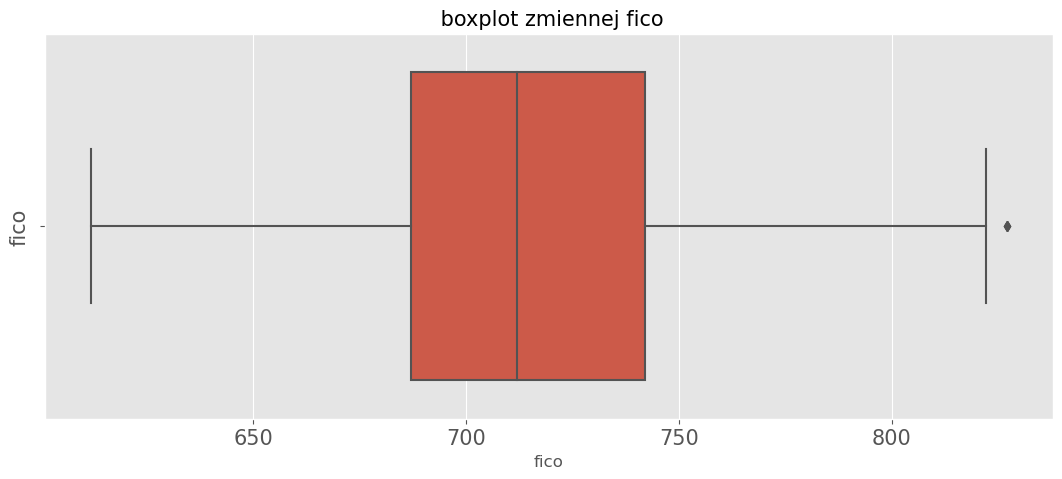

In [202]:
fig, (ax1)=plt.subplots(figsize=(13,5))


sns.boxplot(x='fico',data=df,orient='v',ax=ax1)
ax1.set_ylabel('fico', fontsize=15)
ax1.set_title(' boxplot zmiennej fico', fontsize=15)
ax1.tick_params(labelsize=15)

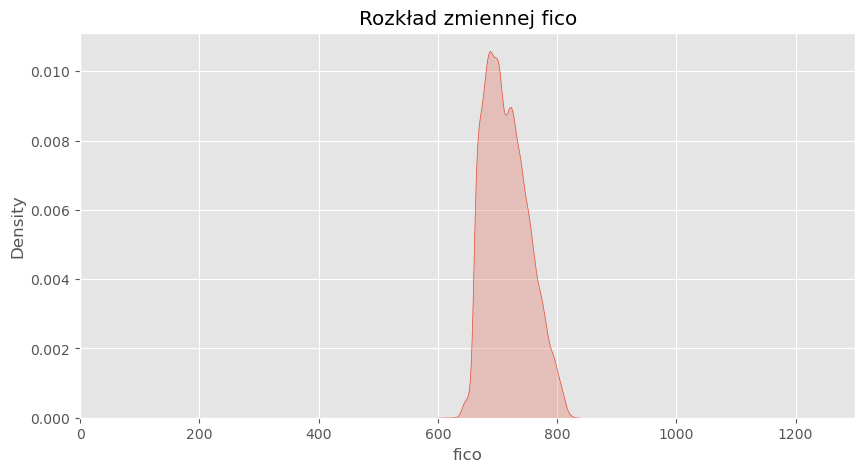

In [203]:
plt.figure(figsize=(10,5))
plt.xlim(0, 1300)
plt.title('Rozkład zmiennej fico')
sns.kdeplot(df['fico'], shade=True)
plt.show()

In [204]:
#Najwyższa gęstość występuje w okolicach 700

In [205]:
#Osoby niespłącające kredytów mają niższy wskaźnik FICO

pd.pivot_table(df, index='niesplacony_splacony', values='fico', aggfunc='mean')

,fico
niesplacony_splacony,
0,702.884
1,717.220


In [206]:
df[['fico','int_rate','term']].corr()

,fico,int_rate,term
fico,1.000,-0.703,0.000
int_rate,-0.703,1.000,0.429
term,0.000,0.429,1.000


In [207]:
#Wskaźnik FICO ma wysoką ujemną korelację z wysokością oprocentowania - im wyższy FICO tym niższe oprocentowanie.

## Zmienne kategoryczne

## GRADE

In [208]:
df.groupby(['grade'])['int_rate'].mean()

grade
A   0.073
B   0.110
C   0.135
D   0.156
E   0.174
F   0.193
G   0.205
Name: int_rate, dtype: float64

In [209]:
#Wraz ze wzrostem grupy, wzrasta oprocentowanie kredytu.

In [210]:
pd.pivot_table(df, index="niesplacony_splacony", columns="grade", aggfunc="size")

grade,A,B,C,D,E,F,G
niesplacony_splacony,,,,,,,
0,610,1518,1504,1327,883,416,173
1,9573,10872,7236,4689,2511,885,339


In [211]:
print("% osób spłacających pożyczki w poszczególnych grupach")
print(f"A: {round((9573)/(610+9573) * 100, 2)}%")
print(f"B: {round((10872)/(1518+10872) * 100, 2)}%")
print(f"C: {round((7236)/(1504+7236) * 100, 2)}%")
print(f"D: {round((4689)/(1327+4689) * 100, 2)}%")
print(f"E: {round((2511)/(883+2511) * 100, 2)}%")
print(f"F: {round((885)/(885+416)* 100, 2)}%")
print(f"G: {round((339)/(173+339)* 100, 2)}%")

% osób spłacających pożyczki w poszczególnych grupach
A: 94.01%
B: 87.75%
C: 82.79%
D: 77.94%
E: 73.98%
F: 68.02%
G: 66.21%


In [212]:
#Wraz ze wzrostem grupy ryzyka, wzrasta również odsetek osób niespłacających kredytów

### HOME OWNERSHIP

In [213]:
df['home_ownership'].value_counts()

RENT        20182
MORTGAGE    18959
OWN          3251
OTHER         136
NONE            8
Name: home_ownership, dtype: int64

In [214]:
#Kategorie 'NONE', 'OTHER' zawierają małe ilości kredytobiorców, 
#dlatego połączę je w jednej kolumnie


df['home_ownership'].replace(['NONE', 'OTHER'], 'OTHERS', inplace=True)

In [215]:
df['home_ownership'].value_counts()

RENT        20182
MORTGAGE    18959
OWN          3251
OTHERS        144
Name: home_ownership, dtype: int64

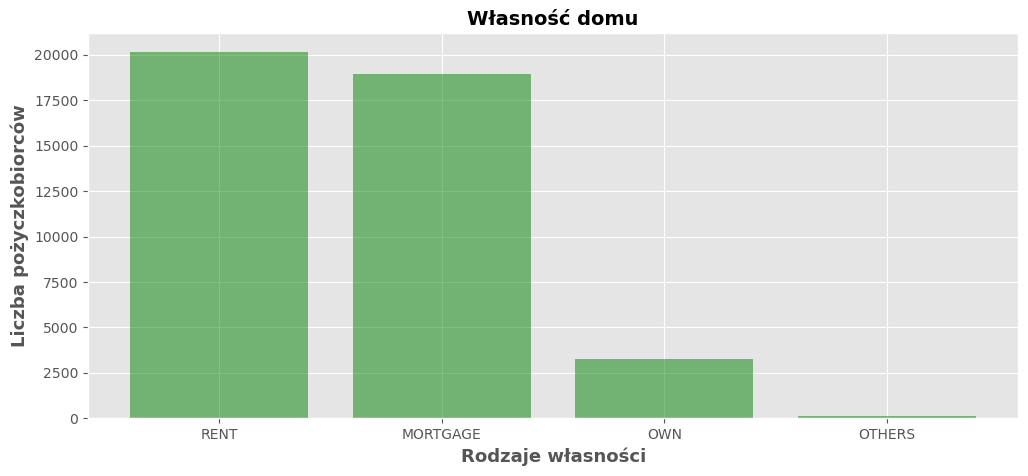

In [216]:
A = df['home_ownership'].value_counts().sort_values(ascending=False)[:5]
f, ax = plt.subplots(figsize=(12,5))
plt.bar(A.index, A.values, color='green', alpha=0.5)
plt.title('Własność domu', fontsize=14.0, fontweight='bold')
plt.xlabel('Rodzaje własności', fontsize=13.0, fontweight='bold')
plt.ylabel("Liczba pożyczkobiorców", fontsize=13.0, fontweight='bold')
plt.show()

In [217]:
#Najwięcej osób biorących kredyty wynajmuje mieszkanie

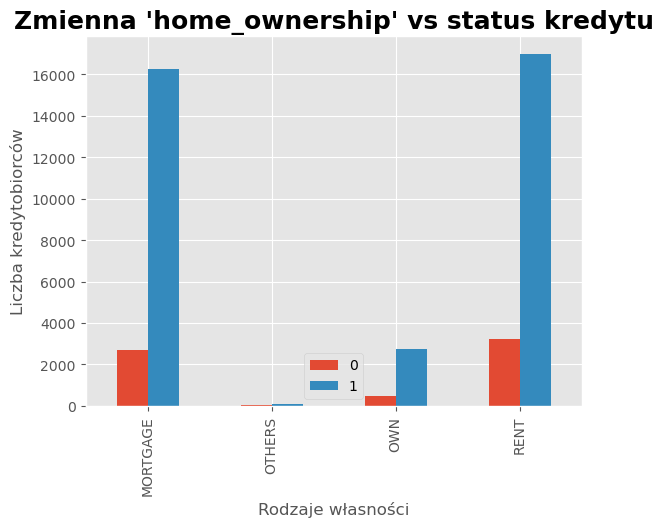

In [218]:
pd.crosstab(df["home_ownership"], df['niesplacony_splacony']).plot(kind="bar")
plt.title("Zmienna 'home_ownership' vs status kredytu", fontsize=18.0, fontweight='bold')
plt.xlabel("Rodzaje własności")
plt.ylabel("Liczba kredytobiorców")
plt.legend(loc="best")
plt.show()

In [219]:
pd.crosstab(df['home_ownership'], df['niesplacony_splacony'])

niesplacony_splacony,0,1
home_ownership,,
MORTGAGE,2699,16260
OTHERS,30,114
OWN,495,2756
RENT,3207,16975


In [220]:
print("% osób spłacających pożyczki w poszczególnych rodzajach własności")
print(f"MORTGAGE: {round((16260)/(2699+16260) * 100, 2)}%")
print(f"OTHERS: {round((114)/(30+114) * 100, 2)}%")
print(f"OWN: {round((2756)/(495+2756) * 100, 2)}%")
print(f"RENT: {round((16975)/(3207+16975) * 100, 2)}%")

% osób spłacających pożyczki w poszczególnych rodzajach własności
MORTGAGE: 85.76%
OTHERS: 79.17%
OWN: 84.77%
RENT: 84.11%


In [221]:
#Osoby spłacające kredyt hipoteczny radzą sobie nieco lepiej niż osoby wynajmujące i posiadające własne domy

In [222]:
#Oprocentowanie z podziałem na poszczególne rodzaje z uwzględnieniem statusu kredytu

pd.crosstab(df['home_ownership'], df['niesplacony_splacony'], values=df['int_rate'], aggfunc='mean')

niesplacony_splacony,0,1
home_ownership,,
MORTGAGE,0.139,0.116
OTHERS,0.139,0.122
OWN,0.138,0.116
RENT,0.139,0.121


In [223]:
#Osoby niespłacające mają wyższe oprocentowanie w każdym rodzaju własności
#Samo oprocentowanie nie różni się zbytnio w poszczególnych rodzajach

In [224]:
#Tabela przedstawia wysokość oprocentowania kredytu z podziałem na grupy ('grade') i status pożyczki dla każdego rodzaju własności

A = pd.crosstab(df['grade'],[df['home_ownership'], df['niesplacony_splacony']], values=df['int_rate'], aggfunc='mean')
A

home_ownership       MORTGAGE       OTHERS         OWN        RENT      
niesplacony_splacony        0     1      0     1     0     1     0     1
grade                                                                   
A                       0.075 0.072  0.088 0.085 0.075 0.073 0.077 0.074
B                       0.111 0.110  0.111 0.113 0.111 0.111 0.111 0.110
C                       0.135 0.135  0.127 0.128 0.135 0.136 0.135 0.135
D                       0.156 0.157  0.156 0.144 0.157 0.156 0.157 0.155
E                       0.176 0.175  0.154 0.160 0.177 0.175 0.173 0.172
F                       0.193 0.195  0.168 0.166 0.197 0.191 0.194 0.190
G                       0.201 0.205  0.190 0.189 0.201 0.205 0.208 0.205

In [225]:
#Ta tabela potwierdza tezę, że osoby z wyższej grupy otrzymują wyższe oprocentowanie (rośnie ono wraz ze wzrostem grupy)
#Wysokość oprocentowania nie różni się też mniędzy poszczególnymi rodzajami własności

### PURPOSE

In [226]:
df['purpose'].value_counts().sort_values(ascending=False)

debt_consolidation    19777
credit_card            5477
other                  4425
home_improvement       3199
major_purchase         2311
small_business         1992
car                    1615
wedding                1004
medical                 753
moving                  629
house                   426
educational             422
vacation                400
renewable_energy        106
Name: purpose, dtype: int64

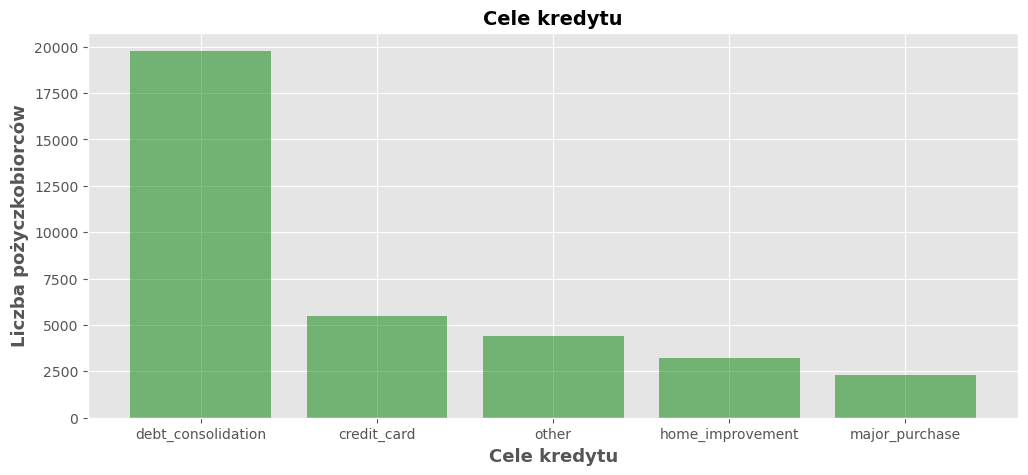

In [227]:
A = df['purpose'].value_counts().sort_values(ascending=False)[:5]
f, ax = plt.subplots(figsize=(12,5))
plt.bar(A.index, A.values, color='green', alpha=0.5)
plt.title('Cele kredytu', fontsize=14.0, fontweight='bold')
plt.xlabel('Cele kredytu', fontsize=13.0, fontweight='bold')
plt.ylabel('Liczba pożyczkobiorców', fontsize=13.0, fontweight='bold')
plt.show()

In [228]:
#Najwięcej osób decyduje się na kredyt konsolidacyjny

In [229]:
#chcę sprawdzić, jaki odsetek kredytów jest spłacany w każdum celu kredytowym

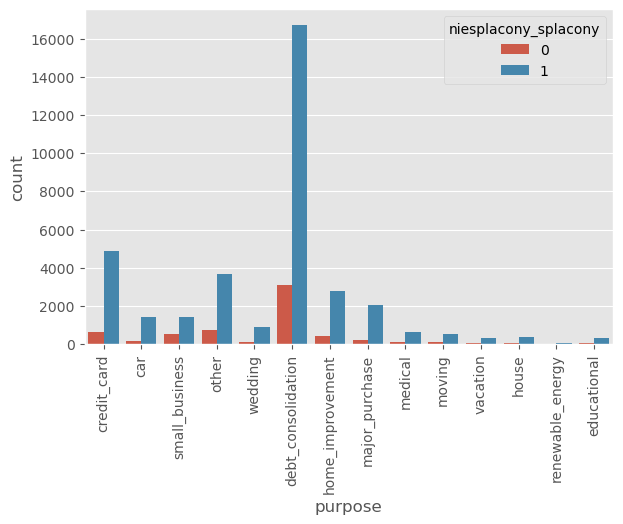

In [230]:
plt.figure(figsize=(15, 20))

plt.subplot(4, 2, 4)
g = sns.countplot(x='purpose', data=df, hue='niesplacony_splacony')
g.set_xticklabels(g.get_xticklabels(), rotation=90);

In [231]:
pd.crosstab(df['purpose'], df['niesplacony_splacony'].sort_values(ascending=False))

niesplacony_splacony,0,1
purpose,,
car,173,1442
credit_card,617,4860
debt_consolidation,3084,16693
educational,88,334
home_improvement,422,2777
house,70,356
major_purchase,245,2066
medical,128,625
moving,107,522


In [232]:
print("% osób spłacających pożyczki w poszczególnych grupach")
print(f"car: {round((1442)/(173+1442) * 100, 2)}%")
print(f"credit_card: {round((4860)/(617+4860) * 100, 2)}%")
print(f"debt_consolidation: {round((16693)/(3084+16693) * 100, 2)}%")
print(f"educational: {round((334)/(88+334) * 100, 2)}%")
print(f"home_improvement: {round((2777)/(422+2777) * 100, 2)}%")
print(f"house: {round((356)/(70+356)* 100, 2)}%")
print(f"major_purchase: {round((339)/(173+339)* 100, 2)}%")
print(f"medical: {round((625)/(128+625) * 100, 2)}%")
print(f"moving: {round((522)/(522+107) * 100, 2)}%")
print(f"other: {round((3667)/(758+3667) * 100, 2)}%")
print(f"renewable_energy: {round((86)/(20+86) * 100, 2)}%")
print(f"small_business: {round((1441)/(551+1441) * 100, 2)}%")
print(f"vacation: {round((341)/(59+341)* 100, 2)}%")
print(f"wedding: {round((895)/(109+895)* 100, 2)}%")

% osób spłacających pożyczki w poszczególnych grupach
car: 89.29%
credit_card: 88.73%
debt_consolidation: 84.41%
educational: 79.15%
home_improvement: 86.81%
house: 83.57%
major_purchase: 66.21%
medical: 83.0%
moving: 82.99%
other: 82.87%
renewable_energy: 81.13%
small_business: 72.34%
vacation: 85.25%
wedding: 89.14%


In [233]:
#Spłacalność kredytów jest podobna dla różnych celów kredytowych (z wyjątkiem 'major_purchase' i 'small_business')
#Wydaje mi się, że ta zmnienna nie będzie miała dużego znaczenia w predykcji

### TERM

In [234]:
pd.crosstab(df['term'], df['niesplacony_splacony'])

niesplacony_splacony,0,1
term,,
36.000,3876,27659
60.000,2555,8446


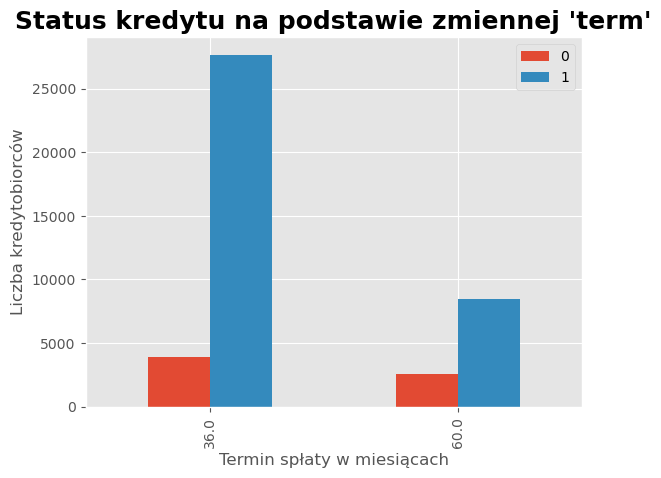

In [235]:
pd.crosstab(df['term'], df['niesplacony_splacony']).plot(kind="bar")
plt.title("Status kredytu na podstawie zmiennej 'term'", fontsize=18.0, fontweight='bold')
plt.xlabel("Termin spłaty w miesiącach")
plt.ylabel("Liczba kredytobiorców")
plt.legend(loc="best")
plt.show()

In [236]:
#Chcę sprawdzić, jak wygląda spłacalność kredytu dla obu wartości

In [237]:
print("% osób niespłacających pożyczki - 36mcy")
print(f"car: {round((3876)/(3876+27659) * 100, 2)}%")

% osób niespłacających pożyczki - 36mcy
car: 12.29%


In [238]:
print("% osób niespłacających pożyczki - 60mcy")
print(f"car: {round((2555)/(2555+8446) * 100, 2)}%")

% osób niespłacających pożyczki - 60mcy
car: 23.23%


In [239]:
#Osoby z dłuższym terminem płatności częściej nie spłacają pożyczek

In [240]:
Let's see the survival count of passengers with respect to the following features:

Pclass
Sex
SibSp
Parch

SyntaxError: EOL while scanning string literal (187123458.py, line 1)

In [ ]:
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='niespłącony_splacony', ascending=False)

In [ ]:
df7

### 1. W jaki sposób wynik FICO wiąże się z prawdopodobieństwem spłacenia pożyczki przez pożyczkobiorcę?

In [ ]:
#Osoby niespłącające kredytów (0) mają niższy wskaźnik FICO

In [ ]:
pd.pivot_table(df, index='niesplacony_splacony', values='fico', aggfunc='mean')

### 2. W jaki sposób wiek kredytowy wiąże się z prawdopodobieństwem niewykonania zobowiązania i czy ryzyko to jest niezależne lub związane z wynikiem FICO?


In [ ]:
pd.crosstab(df['earliest_cr_line'],[df['niesplacony_splacony']])

In [ ]:
#Obliczam, jaki jest odsetek nie- i spłaconych pożyczek dla każdego roku

df_percent = pd.crosstab(df['earliest_cr_line'],df['niesplacony_splacony'],
                         normalize = 'index').rename_axis(None) 

df_percent *= 100

In [ ]:
df_percent

In [ ]:
#Najwcześniej otwarte historie kredytowe mają 100% spłacalność. Jest ich kilka, więc nie wyznaczają trendu, ponieważ 
#od ok 1965 spłacalność waha się między 80 a 90%

In [ ]:
#Korelacja zmiennej'earliest_cr_line' ze zmiennymi FICO jest jedną z najlepszych korelacji zmiennej 'earliest_cr_line'.
#Są one skorelowanie ujemnie - czyli im poźniejszy rok powstania historii kredytowej, tym wskaźniki FICO będą niższe.
#Im niższy wskaźnik FICO, tym większe ryzyko kredytowe
#Długość historii kredytowej nie wykazuje takiej zależności

df.corr()['earliest_cr_line'].sort_values()

### 3. W jaki sposób status kredytu hipotecznego na dom wiąże się z prawdopodobieństwem niewypłacalności?

In [ ]:
#Z analizy wynika, że osoby spłacające kredyt hipoteczny mają najwyższy odsetek spłaconych kredytów 
#dla wszystkich grup zmiennej 'home_ownership'

In [ ]:
print("% osób spłacających pożyczki w poszczególnych rodzajach własności")
print(f"MORTGAGE: {round((16260)/(2699+16260) * 100, 2)}%")
print(f"OTHERS: {round((114)/(30+114) * 100, 2)}%")
print(f"OWN: {round((2756)/(495+2756) * 100, 2)}%")
print(f"RENT: {round((16975)/(3207+16975) * 100, 2)}%")

### 4. W jaki sposób roczny dochód wiąże się z prawdopodobieństwem niewykonania zobowiązania?

In [ ]:
#Osoby niespłącające kredytów mają średnio niższy roczny dochód

In [ ]:
pd.pivot_table(df, index='niesplacony_splacony', values="annual_inc", aggfunc='mean')

### 5. W jaki sposób historia zatrudnienia wiąże się z prawdopodobieństwem niewykonania zobowiązania?

In [ ]:
#Chcę sprawdzić, czy długość zatrudnienia wpływa na spłatę kredytu.

In [ ]:
for rok_pracy in df.emp_length.unique():
    print(f"{rok_pracy} lat pracy:")
    print(f"{df[df.emp_length == rok_pracy].niesplacony_splacony.value_counts(normalize=True)}")
    print('==========================================')

In [ ]:
pd.crosstab(df['emp_length'],[df['niesplacony_splacony']])

In [ ]:
print("% osób niespłacających pożyczek")
print(f"0: {round((751)/(751+4311) * 100, 2)}%")
print(f"1: {round((551)/(551+3044) * 100, 2)}%")
print(f"2: {round((654)/(654+4089) * 100, 2)}%")
print(f"3: {round((630)/(630+3734) * 100, 2)}%")
print(f"4: {round((767)/(767+3995) * 100, 2)}%")
print(f"5: {round((509)/(509+2949) * 100, 2)}%")
print(f"6: {round((352)/(352+2023) * 100, 2)}%")
print(f"7: {round((295)/(295+1580) * 100, 2)}%")
print(f"8: {round((238)/(238+1354) * 100, 2)}%")
print(f"9: {round((180)/(180+1161) * 100, 2)}%")
print(f"10: {round((1504)/(1504+7865) * 100, 2)}%")

In [ ]:
#Wynika z tego, że lata pracy nie wpływają znacząco na spłatę kredytu.
#Rozkład wartości jest bardzo podobny dla wszystkich lat pracy.

#Z tego też względu usuwam tę kolumnę.
df.drop('emp_length', axis=1, inplace=True)

### 6. Jak wielkość żądanej pożyczki jest powiązana z prawdopodobieństwem niewykonania zobowiązania?

In [ ]:
#Z poniższej tabeli, jak i z poprzedniej analizy zmiennej wynika, że osoby niespłacające kredytów zadłużają się na wyższe kwoty

In [ ]:
pd.pivot_table(df, index='niesplacony_splacony', values='loan_amnt', aggfunc='mean')

### Zmienne kategoryczne zamieniam na numeryczne

In [ ]:
#Nie chcę powiększać zbioru danych, dlatego decyduję się na użycie metody get_dummies

In [ ]:
dummies = ['grade', 'home_ownership', 'purpose']
df = pd.get_dummies(df, columns=dummies, drop_first=True)

In [ ]:
df.shape

In [ ]:
df.head()

In [ ]:
df.columns #sprawdzam, czy w nazwach kolumn wysepuje leading space 

### OUTLIERSY

In [ ]:
df1=df.copy()

In [ ]:
df1

In [ ]:
print(f'Liczba outlierow w loan_amnt: ',df1[((df1['loan_amnt'] - df1['loan_amnt'].mean()) / df1['loan_amnt'].std()).abs() >3]['loan_amnt'].count())
print(f'Liczba outlierow w term: ',df1[((df1['term'] - df1['term'].mean()) / df1['term'].std()).abs() >3]['term'].count())
print(f'Liczba outlierow w int_rate: ',df1[((df1['int_rate'] - df1['int_rate'].mean()) / df1['int_rate'].std()).abs() >3]['int_rate'].count())
print(f'Liczba outlierow w installment: ',df1[((df1['installment'] - df1['installment'].mean()) / df1['installment'].std()).abs() >3]['installment'].count())
print(f'Liczba outlierow w annual_inc: ',df1[((df1['annual_inc'] - df1['annual_inc'].mean()) / df1['annual_inc'].std()).abs() >3]['annual_inc'].count())
print(f'Liczba outlierow w dti: ',df1[((df1['dti'] - df1['dti'].mean()) / df1['dti'].std()).abs() >3]['dti'].count())
print(f'Liczba outlierow w inq_last_6mths: ',df1[((df1['inq_last_6mths'] - df1['inq_last_6mths'].mean()) / df1['inq_last_6mths'].std()).abs() >3]['inq_last_6mths'].count())
print(f'Liczba outlierow w open_acc: ',df1[((df1['open_acc'] - df1['open_acc'].mean()) / df1['open_acc'].std()).abs() >3]['open_acc'].count())
print(f'Liczba outlierow w revol_bal: ',df1[((df1['revol_bal'] - df1['revol_bal'].mean()) / df1['revol_bal'].std()).abs() >3]['revol_bal'].count())
print(f'Liczba outlierow w revol_util: ',df1[((df1['revol_util'] - df1['revol_util'].mean()) / df1['revol_util'].std()).abs() >3]['revol_util'].count())
print(f'Liczba outlierow w total_acc: ',df1[((df1['total_acc'] - df1['total_acc'].mean()) / df1['total_acc'].std()).abs() >3]['total_acc'].count())
print(f'Liczba outlierow w fico: ',df1[((df1['fico'] - df1['fico'].mean()) / df1['fico'].std()).abs() >3]['fico'].count())

In [ ]:
#Usuwam outliery zamieniając je medianą
df1.loc[(df1['fico'] < 604.5) | (df1['fico'] > 824.5), 'fico'] = df1['fico'].median()
df1.loc[(df1['installment'] < -228.4) | (df1['installment'] > 822), 'installment'] = df1['installment'].median()
df1.loc[(df1['dti'] < 4.78) | (df1['dti'] > 13.90), 'dti'] = df1['dti'].median()
df1.loc[(df1['annual_inc'] < -23750) | (df1['annual_inc'] > 146250), 'annual_inc'] = df1['annual_inc'].median()
df1.loc[(df1['int_rate'] < 0.02) | (df1['int_rate'] > 0.224), 'int_rate'] = df1['int_rate'].median()
df1.loc[(df1['loan_amnt'] < 5200) | (df1['loan_amnt'] > 15000), 'loan_amnt'] = df1['loan_amnt'].median()
df1.loc[(df1['inq_last_6mths'] < -3) | (df1['inq_last_6mths'] > 5), 'inq_last_6mths'] = df1['inq_last_6mths'].median()
df1.loc[(df1['open_acc'] < -3) | (df1['open_acc'] > 21), 'open_acc'] = df1['open_acc'].median()
df1.loc[(df1['revol_bal'] < -16787) | (df1['revol_bal'] > 37673), 'revol_bal'] = df1['revol_bal'].median()
df1.loc[(df1['total_acc'] < -11) | (df1['total_acc'] > 53), 'total_acc'] = df1['total_acc'].median()

In [ ]:
df1.head()

## Train-test Split

In [ ]:
Y = df1['niesplacony_splacony']
X = df1.drop(['niesplacony_splacony'], axis=1)

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=0)

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Standaryzacja

In [ ]:
#Dzięki standaryzacji zmienne mogą być między sobą porównywane. 
#Standaryzowana zmienna ma średnią na równą 0 i odchylenie standardowe na równe 1

In [ ]:
from sklearn.preprocessing import StandardScaler, normalize

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) 

X_normalized = normalize(X_scaled)
X_normalized = pd.DataFrame(X_normalized)

In [ ]:
X_normalized.head()

### Klasteryzacja -   KMeans, Hierarchiczna i DBScan

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

from sklearn.cluster import DBSCAN
from sklearn import metrics

In [ ]:
df1

In [ ]:
df7

### KMeans

In [ ]:
kmeans = KMeans(n_clusters=5, max_iter=1000)
kmeans.fit(X_normalized)

In [ ]:
kmeans.labels_

In [ ]:
# elbow-curve - chcę sprawdzić optymalną liczbę klastrów

ssd = [] 
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=1000)
    kmeans.fit(X_normalized)
    
    ssd.append(kmeans.inertia_) 

plt.plot(ssd)

In [ ]:
# Na podstawie wykresu optymalna liczba klastrów to 10
# Aby to potwierdzić wykonam test Silhouette

In [ ]:
# Silhouette

range_n_clusters = [ 8, 9, 10, 11, 12]

for num_clusters in range_n_clusters:
    
    
    kmeans = KMeans(n_clusters=num_clusters, max_iter=1000)
    kmeans.fit(X_normalized)
    
    cluster_labels = kmeans.labels_
    
    
    silhouette_avg = silhouette_score(X_normalized, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

In [ ]:
# Wg testu Silhouette za optymalną liczbę klastrów przyjmuję 10

In [ ]:
kmeans = KMeans(n_clusters=10, max_iter=1000, random_state=42)
kmeans.fit(X_normalized)

In [ ]:
kmeans.labels_

In [ ]:
X_normalized['KMeans_Cluster_ID'] = kmeans.labels_

In [ ]:
# Analiza klastrów

In [ ]:
# Liczebność każdego z klastrów

from collections import Counter
Counter(kmeans.labels_)

In [ ]:
pip install data-science-utils

In [ ]:
from ds_utils.unsupervised import plot_cluster_cardinality, plot_cluster_magnitude, plot_magnitude_vs_cardinality
from scipy.spatial.distance import euclidean
import matplotlib.pyplot as plt

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(12,4))

plot_cluster_cardinality(kmeans.labels_,
                         ax=ax1,
                         title="Cardinality")

plot_cluster_magnitude(X_normalized,
                       kmeans.labels_,
                       kmeans.cluster_centers_,
                       euclidean,
                       ax=ax2,
                       title="Magnitude")

plot_magnitude_vs_cardinality(X_normalized,
                              kmeans.labels_,
                              kmeans.cluster_centers_,
                              euclidean,
                              ax=ax3, 
                              title="Magnitude vs. Cardinality")

fig.autofmt_xdate(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
# Cardinality pokazuje, jak liczebne są poszczególne klastry - widać, że klastry 0, 4i 5 jest dużo bardziej liczebne niż pozostałe.  
# Klastry nie są one zbalansowane

# Magnitude pokazuje, jak duży jest rozrzut punktów od centroidów - wyniki pokrywają się z wykresem 'Cardinality'

# Cardinality vs Magnitude pokazuje zależność wartości względem siebie. Najlepiej jakby klastry znajdowały się blisko
# prostej 45 stopni - powyższe klastry znajdują się bardzo blisko prostej

In [ ]:
pd.crosstab(X_normalized['KMeans_Cluster_ID'], df['niesplacony_splacony'], values=df['fico'], aggfunc='mean')

In [ ]:
# Klaster 0, 1, 3 i 6 mają niższe wartości wskaźnika 'fico'

In [ ]:
pd.pivot_table(df1, index=X_normalized['KMeans_Cluster_ID'], aggfunc='mean')

In [ ]:
# Najwyższe zarobki mają klastry 4, 9, 6
# Najniższe: 7, 1, 5

#Najwyższe raty płacą: 2, 4, 5 
#Najniższe: 1, 5, 7

#Najwyższe oprocentowanie: 5, 6, 9
#Najniższe: 4, 7, 8

In [ ]:
pd.crosstab(X_normalized['KMeans_Cluster_ID'],[df1['niesplacony_splacony']])

In [ ]:
print("% osób niespłacających pożyczek")
print(f"0: {round((469)/(469+1542) * 100, 2)}%")
print(f"1: {round((589)/(589+3187) * 100, 2)}%")
print(f"2: {round((1308)/(1308+5139) * 100, 2)}%")
print(f"3: {round((958)/(958+3624) * 100, 2)}%")
print(f"4: {round((576)/(576+5434) * 100, 2)}%")
print(f"5: {round((225)/(225+1966) * 100, 2)}%")
print(f"6: {round((780)/(780+2268) * 100, 2)}%")
print(f"7: {round((806)/(806+6670) * 100, 2)}%")
print(f"8: {round((372)/(372+3802) * 100, 2)}%")
print(f"9: {round((348)/(348+2473) * 100, 2)}%")

In [ ]:
# Najwyższy odsetek osób niespłacających kredytów mają klastry 0 i 6. 
# Klastry 4 i 8 mają najniższy odstetek niespłacających

In [ ]:
# Nie widzę trendu, który mogłabym wykorzystać do zbudowania modelu.

In [ ]:
# Klasteryzacji hierarchicznej i DBScan nie jest w stanie rozwinąć, ponieważ wyskakuje mi błąd - dead kernel
# Miałam w tej sprawie konsultacje z Tomkiem Siarneckim

### Hierarchiczna

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [ ]:
hierarchy_clust =linkage(X_principal, method = 'ward', metric = 'euclidean')

In [ ]:
P = dendrogram(hierarchy_clust)
plt.show()

### DBSCAN

In [ ]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

In [ ]:
dbscan=DBSCAN(eps=3,min_samples=4)

In [ ]:
model=dbscan.fit(X)

In [ ]:
labels=model.labels_

# Modelowanie

In [ ]:
#Wartości zależne i niezależne
X = df1.iloc[:,0:8]
Y = df1.iloc[:,8]

### Drzewo decyzyjne

In [ ]:
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.25, random_state = 0)

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train , Y_train)

Y_pred=dt_model.predict(X_test)
Y_pred1=dt_model.predict_proba(X_test)

In [ ]:
print('Drzewo decyzyjne - dane treningowe:',dt_model.score(X_train,Y_train))
print('Drzewo decyzyjne - dane testowe:',dt_model.score(X_test,Y_test))

acc_dt_model = accuracy_score(Y_test,Y_pred)
print('Accuracy: ',acc_dt_model)
print('MSE: ',metrics.mean_squared_error(Y_test, Y_pred))

In [ ]:
results = pd.DataFrame({'Method':['Drzewo decyzyjne'], 'Accuracy': acc_dt_model},index={'1'})
results = results[['Method', 'Accuracy']]
results

In [ ]:
print('Feature importances: \n',pd.DataFrame(dt_model.feature_importances_,columns=['Imp'],index=X_train.columns))

In [ ]:
def feature_importance(model, labels):
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]
    
    temp = pd.DataFrame(importances[indices], X.columns[indices])
    temp.columns = ["Feature importance"]
    temp["Feature name"] = temp.index
    plt.subplots(figsize=(10, 8))
    ax = sns.barplot(
        y="Feature name",
        x="Feature importance",
        data=temp.iloc[:20, ]
    )
    plt.title("Feature Importance_"+labels)
    plt.savefig(labels+'_FI.png', dpi=150)
    return

In [ ]:
feature_importance(dt_model, 'Imp')

In [ ]:
# Wg powyższego wykresu największą moc predykcyjną będzie miała wartość 'int_rate' - wysokość oprocentowania kredytu

### Regresja logistyczna

In [ ]:
from sklearn.linear_model import LogisticRegression

logit=LogisticRegression()
logit.fit(X_train,Y_train)

Y_pred=logit.predict(X_test)
Y_pred1=logit.predict_proba(X_test)

In [ ]:
print('Regraesja logistyczna - dane treningowe:',logit.score(X_train,Y_train))
print('Regraesja logistyczna - dane testowe:',logit.score(X_test,Y_test))

acc_logit = accuracy_score(Y_test,Y_pred)
print('Accuracy: ',acc_logit)
print('MSE: ',metrics.mean_squared_error(Y_test, Y_pred))

In [ ]:
results_logit = pd.DataFrame({'Method':['Regresja logistyczna'], 'Accuracy': [acc_logit]},index={'2'})
results = pd.concat([results, results_logit])
results

### Regresja logistyczna K-Fold Cross-Validation

In [ ]:
kf=KFold(n_splits=20)
score=cross_val_score(logit,X,Y,cv=kf)
avg_logit = score.mean()
print('Średnia k-fold:',avg_logit )

In [ ]:
results_kfold = pd.DataFrame({'Method':['Regresja logistyczna k fold'], 'Accuracy': [avg_logit]},index={'3'})
results = pd.concat([results, results_kfold])
results

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

random_forest=RandomForestClassifier()
random_forest.fit(X_train,Y_train)

Y_pred=random_forest.predict(X_test)
Y_pred1=random_forest.predict_proba(X_test)

In [ ]:
print('RandomForest - dane treningowe:',random_forest.score(X_train,Y_train))
print('RandomForest - dane testowe:',random_forest.score(X_test,Y_test))

acc_random_forest = accuracy_score(Y_test,Y_pred)
print('Accuracy: ',acc_random_forest)
print('MSE: ',metrics.mean_squared_error(Y_test, Y_pred))

In [ ]:
results_rf = pd.DataFrame({'Method':['RandomForest'], 'Accuracy': acc_random_forest},index={'4'})
results = pd.concat([results, results_rf])
results = results[['Method', 'Accuracy']]
results

### RandomForest K-Fold Cross-Validation

In [ ]:
kf=KFold(n_splits=20)
score=cross_val_score(random_forest,X,Y,cv=kf)
avg_random_forest = score.mean()
print('Średnia k-fold:',avg_random_forest)

In [ ]:
results_kfold_rf = pd.DataFrame({'Method':['RandomForest k fold'], 'Accuracy': [avg_random_forest]},index={'5'})
results = pd.concat([results, results_kfold_rf])
results

### Support Vector Machine

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model_SVC=RandomForestClassifier()
model_SVC.fit(X_train,Y_train)

Y_pred=model_SVC.predict(X_test)
Y_pred1=model_SVC.predict_proba(X_test)

In [ ]:
print('SVC - dane treningowe:',model_SVC.score(X_train,Y_train))
print('SVC - dane testowe:',model_SVC.score(X_test,Y_test))

acc_model_SVC = accuracy_score(Y_test,Y_pred)
print('Accuracy: ',acc_model_SVC)
print('MSE: ',metrics.mean_squared_error(Y_test, Y_pred))

In [ ]:
results_SVC = pd.DataFrame({'Method':['SVC'], 'Accuracy': acc_model_SVC},index={'6'})
results = pd.concat([results, results_SVC])
results = results[['Method', 'Accuracy']]
results

### Support Vector Machine K-Fold Cross-Validation

In [ ]:
kf=KFold(n_splits=20)
score=cross_val_score(model_SVC,X,Y,cv=kf)
avg_model_SVC = score.mean()
print('Średnia k-fold:',avg_model_SVC)

In [ ]:
results_kfold_SVC = pd.DataFrame({'Method':['SVC k fold'], 'Accuracy': [avg_model_SVC]},index={'7'})
results = pd.concat([results, results_kfold_SVC])
results

### XGBoost

In [ ]:
pip install xgboost

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y_train = le.fit_transform(Y_train)

In [ ]:
from xgboost import XGBClassifier

model_XGB = XGBClassifier(random_state=1,learning_rate=0.01)
model_XGB.fit(X_train,Y_train)

Y_pred = model_XGB.predict(X_test)

In [ ]:
print('XGB - dane treningowe:',model_XGB.score(X_train,Y_train))
print('XGB - dane testowe:',model_XGB.score(X_test,Y_test))

acc_model_XGB = accuracy_score(Y_test,Y_pred)
print('Accuracy: ',acc_model_XGB)
print('MSE: ',metrics.mean_squared_error(Y_test, Y_pred))

In [ ]:
results_XGB = pd.DataFrame({'Method':['XGBoost'], 'Accuracy': acc_model_XGB},index={'8'})
results = pd.concat([results, results_XGB])
results = results[['Method', 'Accuracy']]
results

### XGBoost K-Fold Cross-Validation

In [ ]:
kf=KFold(n_splits=20)
parameters = {

    'min_child_weight':(0,0.1,1,10,100,500),
    'learning_rate':(0.01, 0.1,1),
    'min_split_loss':(0,0.01,0.1,1),
    'max_depth':(2,6,8,10,12),
    'lambda':(0.1,1,2,5,10)
}
score=cross_val_score(model_XGB,X,Y,cv=kf,)
avg_model_XGB = score.mean()
print('Średnia k-fold:',avg_model_XGB)

In [ ]:
results_kfold_XGB = pd.DataFrame({'Method':['XGBoost k fold'], 'Accuracy': [avg_model_XGB]},index={'9'})
results = pd.concat([results, results_kfold_XGB])
results

### AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

model_ADA=AdaBoostClassifier()
model_ADA.fit(X_train,Y_train)

Y_pred=model_ADA.predict(X_test)
Y_pred1=model_ADA.predict_proba(X_test)

In [ ]:
print('ADA - dane treningowe:',model_ADA.score(X_train,Y_train))
print('ADA - dane testowe:',model_ADA.score(X_test,Y_test))

acc_model_ADA = accuracy_score(Y_test,Y_pred)
print('Accuracy: ',acc_model_ADA)
print('MSE: ',metrics.mean_squared_error(Y_test, Y_pred))

In [ ]:
results_ADA = pd.DataFrame({'Method':['ADA'], 'Accuracy': acc_model_ADA},index={'10'})
results = pd.concat([results, results_ADA])
results = results[['Method', 'Accuracy']]
results

### AdaBoost K-Fold Cross-Validation

In [ ]:
kf=KFold(n_splits=10)
score=cross_val_score(model_ADA,X,Y,cv=kf)
avg_model_ADA = score.mean()
print('Średnia k-fold:',avg_model_ADA)

In [ ]:
results_kfold_ADA = pd.DataFrame({'Method':['ADA k fold'], 'Accuracy': [avg_model_ADA]},index={'11'})
results = pd.concat([results, results_kfold_ADA])
results

### BaggingClassifier

In [ ]:
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier

model_bagging=BaggingClassifier()
model_bagging.fit(X_train,Y_train)

Y_pred=model_bagging.predict(X_test)
Y_pred1=model_bagging.predict_proba(X_test)

In [ ]:
print('BaggingClassifier - dane treningowe:',model_bagging.score(X_train,Y_train))
print('BaggingClassifier - dane testowe:',model_bagging.score(X_test,Y_test))

acc_model_bagging = accuracy_score(Y_test,Y_pred)
print('Accuracy: ',acc_model_bagging)
print('MSE: ',metrics.mean_squared_error(Y_test, Y_pred))

In [ ]:
results_BaggingClassifier = pd.DataFrame({'Method':['BaggingClassifier'], 'Accuracy': acc_model_bagging},index={'12'})
results = pd.concat([results, results_BaggingClassifier])
results = results[['Method', 'Accuracy']]
results

### BaggingClassifier K-Fold Cross-Validation

In [ ]:
kf=KFold(n_splits=10)
score=cross_val_score(model_bagging,X,Y,cv=kf)
avg_model_bagging = score.mean()
print('Średnia k-fold:',avg_model_bagging)

In [ ]:
results_kfold_BaggingClassifier = pd.DataFrame({'Method':['BaggingClassifier k fold'], 'Accuracy': [avg_model_bagging]},index={'13'})
results = pd.concat([results, results_kfold_BaggingClassifier])
results

### KNeighborsClassifier

In [ ]:
from sklearn import metrics

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
error=[]
for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,Y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i!=Y_test))

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(range(1,30),error,color='red', linestyle='dashed',marker='o',markerfacecolor='blue',markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean error')

In [ ]:

model_KNN8= KNeighborsClassifier(n_neighbors=8)
model_KNN8.fit(X_train, Y_train)

Y_pred=model_KNN8.predict(X_test)
Y_pred1=model_KNN8.predict_proba(X_test)

In [ ]:

model_KNN11= KNeighborsClassifier(n_neighbors=11)
model_KNN11.fit(X_train, Y_train)

Y_pred=model_KNN11.predict(X_test)
Y_pred1=model_KNN11.predict_proba(X_test)

In [ ]:
print('KNN 8- dane treningowe:',model_KNN8.score(X_train,Y_train))
print('KNN 8- dane testowe:',model_KNN8.score(X_test,Y_test))

acc_model_KNN8 = accuracy_score(Y_test,Y_pred)
print('Accuracy: ',acc_model_KNN8)
print('MSE: ',metrics.mean_squared_error(Y_test, Y_pred))

In [ ]:
results_KNN = pd.DataFrame({'Method':['KNN'], 'Accuracy': acc_model_KNN},index={'14'})
results = pd.concat([results, results_KNN])
results = results[['Method', 'Accuracy']]
results

### KNeighborsClassifier K-Fold Cross-Validation

In [ ]:
kf=KFold(n_splits=15)
score=cross_val_score(model_KNN,X,Y,cv=kf)
avg_model_KNN = score.mean()
print('Średnia k-fold:',avg_model_KNN)

In [ ]:
results_kfold_KNN= pd.DataFrame({'Method':['KNN k fold'], 'Accuracy': [avg_model_KNN]},index={'15'})
results = pd.concat([results, results_kfold_KNN])
results

### Model Ensemble 

In [ ]:
LR=LinearClassifier()
KN=KNeighborsClassifier(n_neighbors=3)
SVM=svm.SVR(kernel='linear')

In [ ]:
evc=VotingRegressor(estimators=[('LR',LR),('KN',KN),('SVM',SVM)])
evc.fit(X_train, Y_train)

In [ ]:
y_pred = evc.predict(X_test)

print('Ensemble - dane treningowe:',evc.score(X_train,Y_train))
print('Ensemble - dane testowe:',evc.score(X_test,Y_test))

acc_E=metrics.r2_score(Y_test, Y_pred)
print('Accuracy ensemble: ',acc_E)
print('MSE: ',metrics.mean_squared_error(Y_test, Y_pred))

In [ ]:
tempResultsDf = pd.DataFrame({'Method':['Ensemble'], 'Accuracy': [acc_E]},index={'16'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

In [ ]:
kf=KFold(n_splits=15)
score=cross_val_score(evc,X,Y,cv=kf)
acc_E = score.mean()
print('Średnia k-fold:',acc_E)

In [ ]:
tempResultsDf = pd.DataFrame({'Method':['Ensemble k fold'], 'Accuracy': [accuracy]},index={'17'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'Accuracy']]
results

## PCA

In [ ]:
from sklearn.decomposition import PCA

In [ ]:

pca = PCA(n_components = 2)
X_principal = pca.fit_transform(X_normalized)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1', 'P2']


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [ ]:
fig, ax = plt.subplots(figsize=(10, 7))
for label, color in zip(set(y_train), ('orange', 'blue', 'brown')):
    ax.scatter(
        X_train_pca[Y_train == label, 0],
        X_train_pca[Y_train == label, 1],
        color=color, label=f'Class {label}'
    )

ax.set_title('Dataset after Principal Component Analysis ')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.legend(loc='upper right')

## PCA

In [ ]:
from sklearn.decomposition import PCA

In [ ]:

pca = PCA(n_components = 2)
X_principal = pca.fit_transform(X_normalized)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1', 'P2']


In [ ]:
X_principal.head()

In [ ]:
X_principal.shape

### SMOTE 

In [ ]:
#Zmienna objaśniana (target) jest niezbalansowana - 85% stanowią spłacone kredyty. 
#Żeby zbalansować dane użyję metody SMOTE (zduplikuje obserwacje z klasy mniejszościowej w zbiorze treningowym)


# na zbiorze treningowym, inne zbiory do sprawdzenia przed i po smote

In [ ]:
from collections import Counter
from sklearn.datasets import make_classification
from matplotlib import pyplot
from numpy import where

X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
    n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)

counter = Counter(y)
print(counter)

for label, _ in counter.items():
    row_ix = where(y == label)[0]
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

In [ ]:
#Ten scatter plot przedstawia klasę większościową (czerwoną) oraz rozproszoną klasę mniejszościową (niebieską) 

In [ ]:
!pip3 install imblearn

In [ ]:
# Oversampluję dane metodą SMOTE

from imblearn.over_sampling import SMOTE

X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
    n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)

counter = Counter(y)
print(counter)

oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

counter = Counter(y)
print(counter)

for label, _ in counter.items():
    row_ix = where(y == label)[0]
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

In [ ]:
# Widać dużo większy udział klasy mniejszościowej

In [ ]:
# Sprawdzam, jak dane zachowują się po implementacji SMOTE

In [ ]:
# drzewo decyzyjne - niezbilansowane dane
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier

X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
    n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)

model = DecisionTreeClassifier()

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC: %.3f' % mean(scores))

In [ ]:
# drzewo decyzyjne - SMOTE
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
    n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)

steps = [('over', SMOTE()), ('model', DecisionTreeClassifier())]
pipeline = Pipeline(steps=steps)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC: %.3f' % mean(scores))

In [ ]:
## Hyper Parameter Optimization

params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [ ]:
## Hyperparameter optimization using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import xgboost

In [ ]:
classifier=xgboost.XGBClassifier()

In [ ]:
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [ ]:
random_search.best_estimator_

In [ ]:
random_search.best_params_

In [ ]:
classifier=xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.4, gamma=0.1, learning_rate=0.25,
       max_delta_step=0, max_depth=3, min_child_weight=7, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [ ]:
score

In [ ]:
score.mean()

## AUROC

In [ ]:
import matplotlib as mpl
from cycler import cycler
mpl.rcParams['axes.prop_cycle'] = cycler(color='bgrcmyk')

In [ ]:
ns_probs = [0 for _ in range(len(y_test))]

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
# predict probabilities
lr_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic Regression: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.figure(figsize=(12,4))
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic Regression')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
y_pred = model.predict(X_test)
confusion_matrix(y_test, y_pred)

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
performance_report = classification_report(y_test, y_pred, output_dict=True)

In [ ]:
performance_report

In [ ]:
def evaluate_performance(y_test, y_pred):
    performance_report = classification_report(y_test, y_pred, output_dict=True)
    accuracy = performance_report['accuracy']
    precision = performance_report['1']['precision']
    recall = performance_report['1']['recall']
    
    return {'accuracy': accuracy,
            'precision': precision,
            'recall': recall}

In [ ]:
evaluate_performance(y_test, y_pred)

In [ ]:
model_summary = evaluate_performance(y_test, y_pred)
model_summary['model'] = current_model
model_summary['auroc'] = lr_auc

In [ ]:
pd.DataFrame([model_summary])

In [ ]:
from sklearn import metrics
from sklearn.metrics import roc_curve


def plot_ROC(model, labels):
    '''Plot ROC and save the pic'''
    Y_test_pred = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(Y_test, Y_test_pred)
    plt.figure(1)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr, label=labels)
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve - {} model'.format(labels))
    plt.legend(loc='best')
    plt.savefig(labels+'_ROC.png', dpi=150)
    plt.show()
    print("AUC score is", metrics.auc(fpr, tpr))
    return

## PCA

In [ ]:
from sklearn.decomposition import PCA

In [ ]:

pca = PCA(n_components = 2)
X_principal = pca.fit_transform(X_normalized)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1', 'P2']


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [ ]:
fig, ax = plt.subplots(figsize=(10, 7))
for label, color in zip(set(y_train), ('orange', 'blue', 'brown')):
    ax.scatter(
        X_train_pca[Y_train == label, 0],
        X_train_pca[Y_train == label, 1],
        color=color, label=f'Class {label}'
    )

ax.set_title('Dataset after Principal Component Analysis ')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.legend(loc='upper right')

### SMOTE 

In [ ]:
#Zmienna objaśniana (target) jest niezbalansowana - 85% stanowią spłacone kredyty. 
#Żeby zbalansować dane użyję metody SMOTE (zduplikuje obserwacje z klasy mniejszościowej w zbiorze treningowym)


# na zbiorze treningowym, inne zbiory do sprawdzenia przed i po smote

In [ ]:
from collections import Counter
from sklearn.datasets import make_classification
from matplotlib import pyplot
from numpy import where

X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
    n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)

counter = Counter(y)
print(counter)

for label, _ in counter.items():
    row_ix = where(y == label)[0]
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

In [ ]:
#Ten scatter plot przedstawia klasę większościową (czerwoną) oraz rozproszoną klasę mniejszościową (niebieską) 

In [ ]:
!pip3 install imblearn

In [ ]:
# Oversampluję dane metodą SMOTE

from imblearn.over_sampling import SMOTE

X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
    n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)

counter = Counter(y)
print(counter)

oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

counter = Counter(y)
print(counter)

for label, _ in counter.items():
    row_ix = where(y == label)[0]
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

In [ ]:
# Widać dużo większy udział klasy mniejszościowej

In [ ]:
# Sprawdzam, jak dane zachowują się po implementacji SMOTE

In [ ]:
# drzewo decyzyjne - niezbilansowane dane
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier

X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
    n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)

model = DecisionTreeClassifier()

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC: %.3f' % mean(scores))

In [ ]:
# drzewo decyzyjne - SMOTE
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
    n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)

steps = [('over', SMOTE()), ('model', DecisionTreeClassifier())]
pipeline = Pipeline(steps=steps)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC: %.3f' % mean(scores))

In [ ]:
#6. Wytrenowanie tych samych modeli co wcześniej, ale na danych skompresowanych i porównanie otrzymanych wyników.
#Zbuduj finalny model, którego AUROC score będzie >= 80%, 
#pamiętaj o doborze istotnych zmiennych, kroswalidacji oraz 
#dostrojeniu parametrów modelu, pomyśl również o zbalansowaniu klas. (40pkt)

In [ ]:
#with classification problems where False Negatives are a lot more expensive than False Positives, 
#we may want to have a model with a high recall rather than high precision. 